### Plot the SA fit and spectra together

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii, fits
from matplotlib.gridspec import GridSpec
from scipy import interpolate
import pandas as pd
%matplotlib inline

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [23]:
# load atmospheric transmission file
hdu = fits.open('/Users/jpw/idl/Spextool/data/atran75000.fits')
tdata = hdu[0].data
atrans = interpolate.interp1d(tdata[0,:], tdata[1,:])

In [24]:
# define the input file parameters
path = '/Users/jpw/Analysis/NIRSPEC/iSHELL/240107/'
source = 'HLTau'
PA1 = 48
source = 'CWTau'
PA1 = 61

path = '/Volumes/JPW_2TB/iSHELL/230630/'
source = 'Elias24'
PA1 = 136

# load the spectrum and SA
hdu1 = fits.open(path+'reduced/'+'c'+source+'_PA'+str(PA1)+'.fits')
data1 = hdu1[0].data
wave_flux1 = data1[:,0,:].flatten()
flux1 = data1[:,1,:].flatten()
err_flux1 = data1[:,2,:].flatten()
hd1 = hdu1[0].header
hdu1.close()
SA_par = pd.read_csv(path+'rectified/'+source+'_PA'+str(PA1)+'_SA.csv', skipinitialspace=True)

PA2 = PA1 + 180
hdu2 = fits.open(path+'reduced/'+'c'+source+'_PA'+str(PA2)+'.fits')
data2 = hdu2[0].data
wave_flux2 = data2[:,0,:].flatten()
flux2 = data2[:,1,:].flatten()
err_flux2 = data2[:,2,:].flatten()
hd2 = hdu2[0].header
hdu2.close()
SA_antipar = pd.read_csv(path+'rectified/'+source+'_PA'+str(PA2)+'_SA.csv', skipinitialspace=True)

(4.65, 4.669)

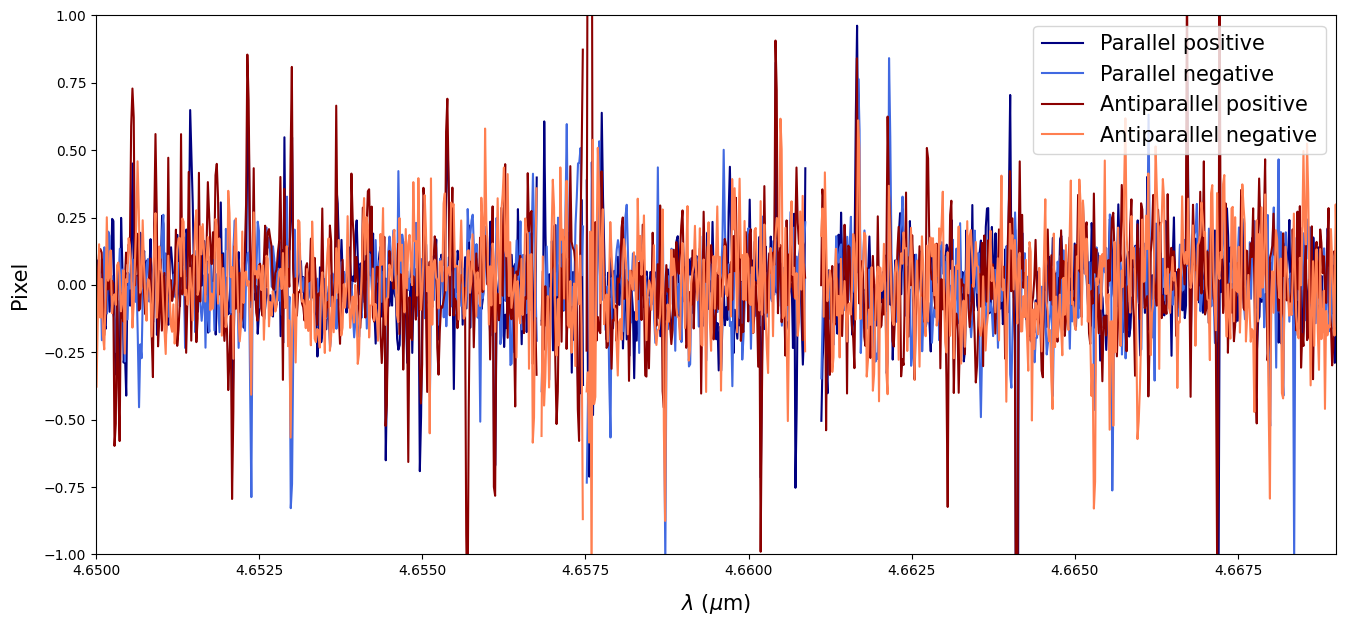

In [25]:
# look at the SA signals for the pos and neg for each parallel and anti-parallel slit
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111)


ax.plot(SA_par['wavelength'], SA_par['off_pos'], color='navy', label='Parallel positive')
#ax.fill_between(SA_par['wavelength'], SA_par['off_pos']-SA_par['err_pos'],  SA_par['off_pos']+SA_par['err_pos'], color='navy', alpha=0.1)


ax.plot(SA_par['wavelength'], SA_par['off_neg'], color='royalblue', label='Parallel negative')
#ax.fill_between(SA_par['wavelength'], SA_par['off_neg']-SA_par['err_neg'],  SA_par['off_neg']+SA_par['err_neg'], color='royalblue', alpha=0.1)


ax.plot(SA_antipar['wavelength'], SA_antipar['off_pos'], color='darkred', label='Antiparallel positive')
#ax.fill_between(SA_antipar['wavelength'], SA_antipar['off_pos']-SA_antipar['err_pos'],  SA_antipar['off_pos']+SA_antipar['err_pos'], color='darkred', alpha=0.1)

ax.plot(SA_antipar['wavelength'], SA_antipar['off_neg'], color='coral', label='Antiparallel negative')
#ax.fill_between(SA_antipar['wavelength'], SA_antipar['off_neg']-SA_antipar['err_neg'],  SA_antipar['off_neg']+SA_antipar['err_neg'], color='coral', alpha=0.1)

ax.legend(fontsize=15)
ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 15, labelpad=10)
ax.set_ylabel('Pixel', fontsize = 15, labelpad=10)
ax.set_ylim(-1, 1)
ax.set_xlim(4.65,4.669)

(4.7, 4.8)

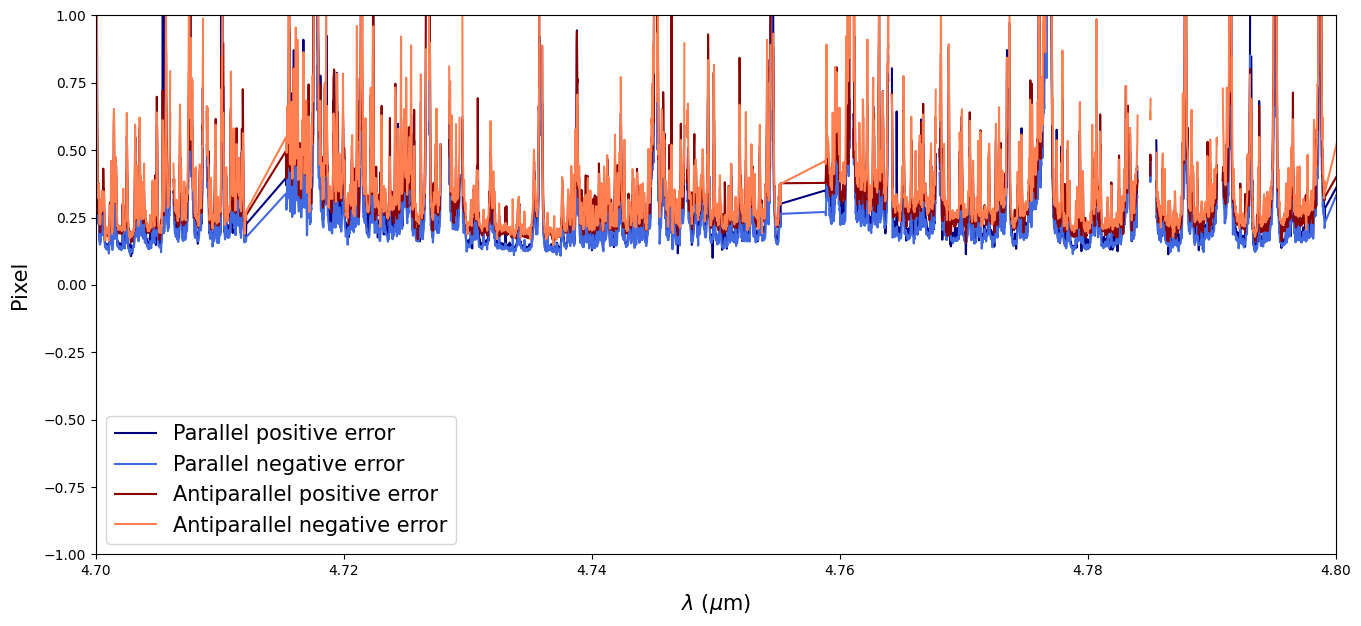

In [26]:
# look at the SA signals for the pos and neg for each parallel and anti-parallel slit
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111)

ax.plot(SA_par['wavelength'], SA_par['err_pos'], color='navy', label='Parallel positive error')
ax.plot(SA_par['wavelength'], SA_par['err_neg'], color='royalblue', label='Parallel negative error')
ax.plot(SA_antipar['wavelength'], SA_antipar['err_pos'], color='darkred', label='Antiparallel positive error')
ax.plot(SA_antipar['wavelength'], SA_antipar['err_neg'], color='coral', label='Antiparallel negative error')

ax.legend(fontsize=15)
ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 15, labelpad=10)
ax.set_ylabel('Pixel', fontsize = 15, labelpad=10)
ax.set_ylim(-1, 1)
ax.set_xlim(4.7,4.8)

In [27]:
# wavelength axis
wl_par = SA_par['wavelength']
wl_antipar = SA_antipar['wavelength']

In [28]:
# weighted average (where the uncertainties are the weights) for both parallel and anti-parallel

# parallel
weight_neg = 1/SA_par['err_neg']**2
weight_pos = 1/SA_par['err_pos']**2
SA_par_ave = (SA_par['off_neg']*weight_neg + SA_par['off_pos']*weight_pos) / (weight_neg+weight_pos)
SA_par_err = np.sqrt(1/(weight_neg+weight_pos))

# anti-parallel
weight_neg = 1/SA_antipar['err_neg']**2
weight_pos = 1/SA_antipar['err_pos']**2
SA_antipar_ave = (SA_antipar['off_neg']*weight_neg + SA_antipar['off_pos']*weight_pos) / (weight_neg+weight_pos)
SA_antipar_err = np.sqrt(1/(weight_neg+weight_pos))

(4.65, 4.669)

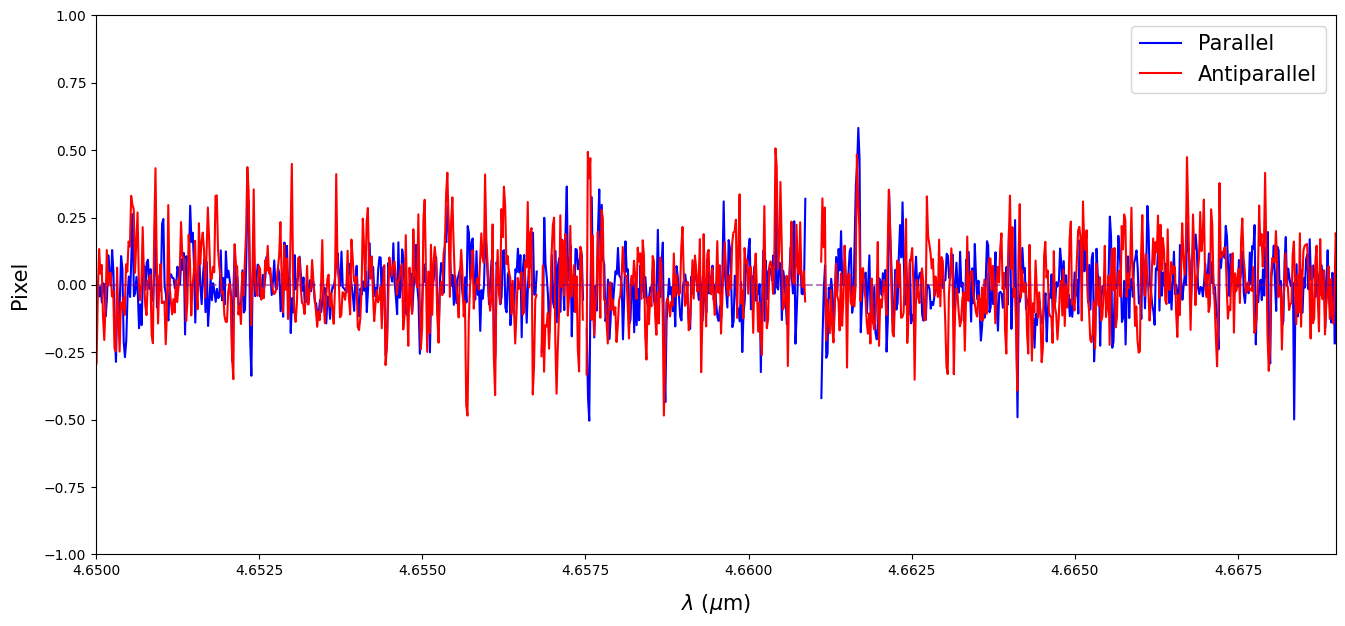

In [29]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111)

ax.plot(wl_par, SA_par_ave, label='Parallel', color='blue')
ax.plot(wl_antipar, SA_antipar_ave, label='Antiparallel', color='red')
plt.hlines(0,0,5.2, color='purple', linestyle='dashed', alpha=0.5)

plt.legend(fontsize=15)
ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 15, labelpad=10)
ax.set_ylabel('Pixel', fontsize = 15, labelpad=10)
ax.set_ylim(-1, 1)
ax.set_xlim(4.65,4.669)

(4.65, 4.669)

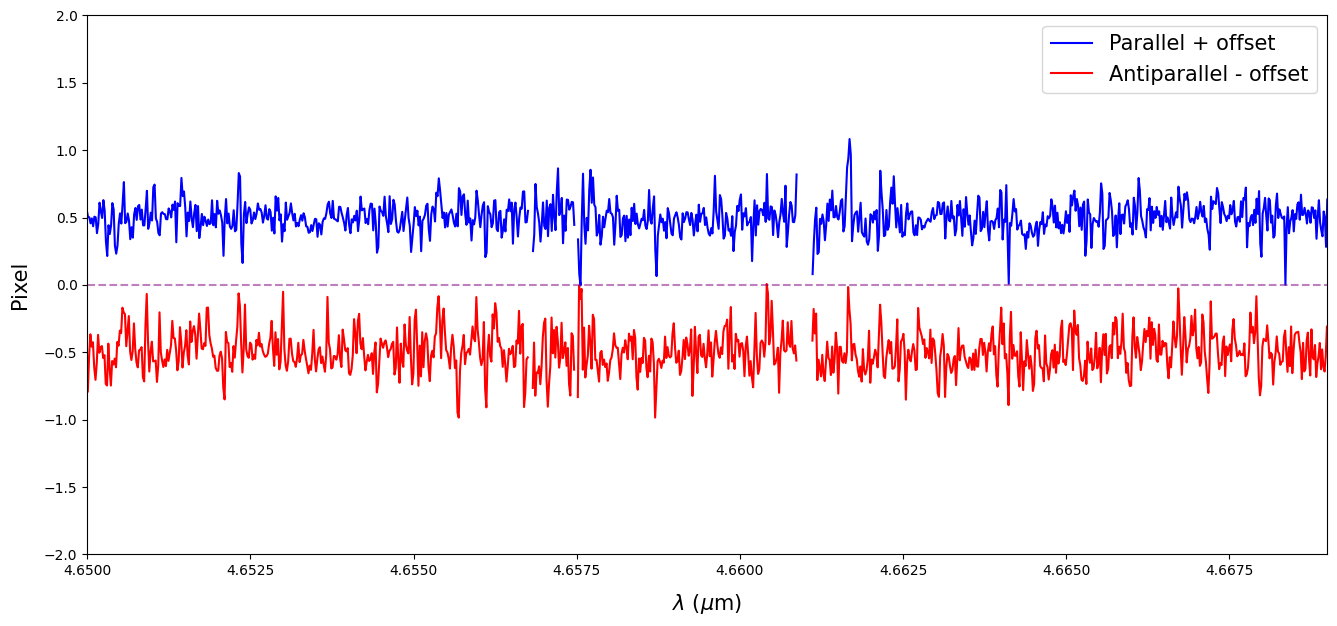

In [30]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111)

ax.plot(wl_par, SA_par_ave+0.5, label='Parallel + offset', color='blue')
ax.plot(wl_antipar, SA_antipar_ave-0.5, label='Antiparallel - offset', color='red')
plt.hlines(0,0,5.2, color='purple', linestyle='dashed', alpha=0.5)

plt.legend(fontsize=15)
ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 15, labelpad=10)
ax.set_ylabel('Pixel', fontsize = 15, labelpad=10)
ax.set_ylim(-2, 2)
ax.set_xlim(4.65,4.669)

In [31]:
# since the wavelength axis for SA_par and SA_antipar are slightly different (coming from 2 different observations)
# we create a continuum function of SA_antipar by interpolating it on its wavelength axis, so then we can
# obtain the SA_antipar values on the same values of the wavelength axis of SA_par

SA_antipar_ave_interp = interpolate.interp1d(wl_antipar, SA_antipar_ave, bounds_error=False)
SA_antipar_err_interp = interpolate.interp1d(wl_antipar, SA_antipar_err, bounds_error=False)

In [32]:
# weighted average (where the uncertainties are the weights) for both parallel and anti-parallelweight_par = 1/SA_par_err**2
weight_par = 1/SA_par_err**2
weight_antipar = 1/SA_antipar_err_interp(wl_par)**2

SA_comb_ave = (SA_par_ave*weight_par - SA_antipar_ave_interp(wl_par)*weight_antipar) / (weight_par+weight_antipar)
SA_comb_err = np.sqrt(1/(weight_par+weight_antipar))

pixel_to_mas = 125      # From documentation 1 pixel = 0.125''

SA_comb_mas = SA_comb_ave * pixel_to_mas
SA_comb_err_mas = SA_comb_err * pixel_to_mas

In [33]:
csvfile = open(path+f'rectified/{source}_SA_combined_PA{PA1}_{PA2}.csv', 'w')
csvfile.write('wavelength,  SA, err_SA\n')

for i in range(wl_par.size):
    csvfile.write(f'{wl_par[i]:11.9f}, {SA_comb_mas[i]:.5f}, {SA_comb_err_mas[i]:.5f}\n')
    
csvfile.close()

(4.7, 4.75)

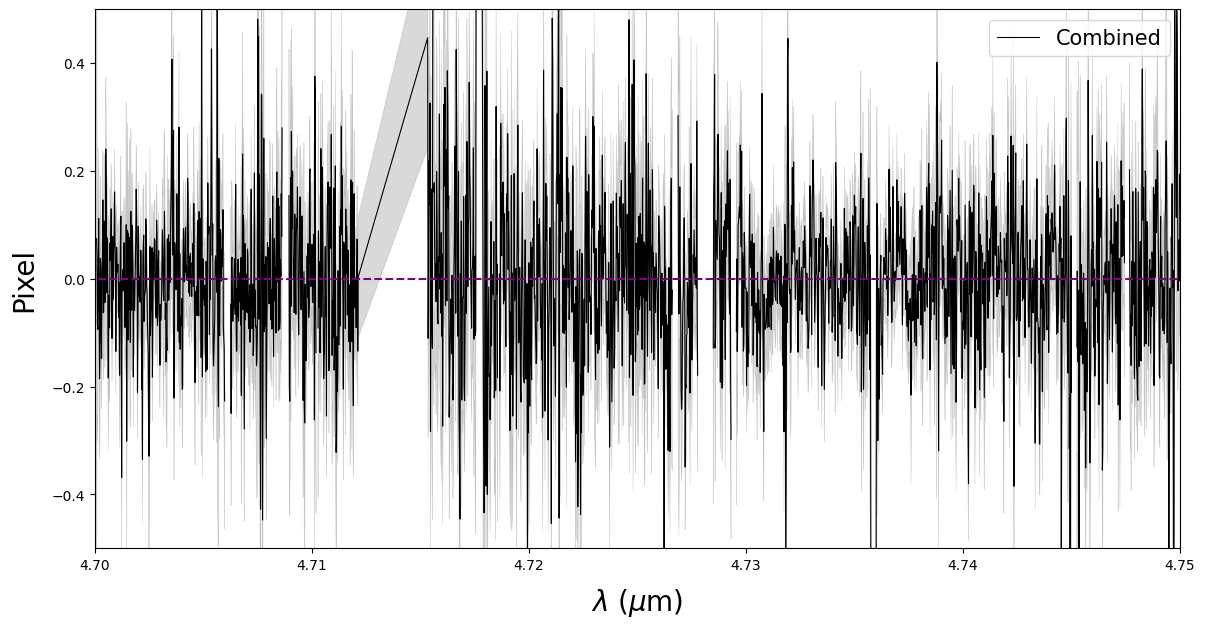

In [34]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)


ax.plot(wl_par, SA_comb_ave, label='Combined', color='k', lw=0.8)
ax.fill_between(wl_par, SA_comb_ave-SA_comb_err, SA_comb_ave+SA_comb_err, color='k', alpha=0.15, lw=0.5)
ax.hlines(0,0,5.2, color='purple', linestyle='dashed')

ax.legend(fontsize=15)
ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 20, labelpad=10)
ax.set_ylabel('Pixel', fontsize = 20, labelpad=10)
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(4.7,4.75)

(-1.0, 1.0)

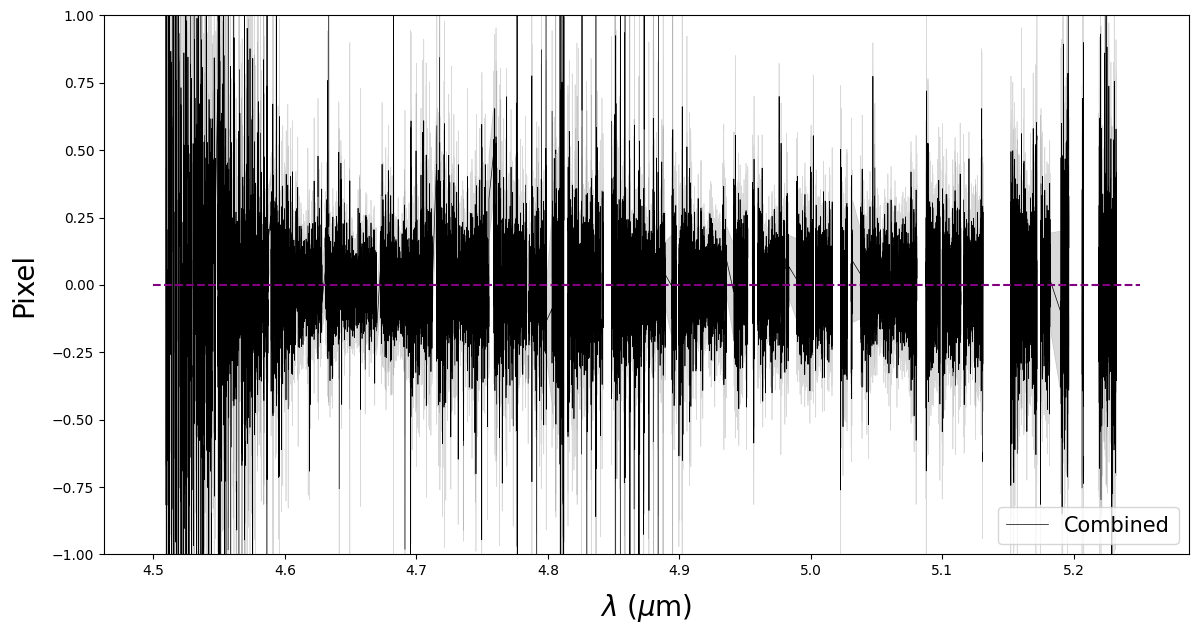

In [35]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)


ax.plot(wl_par, SA_comb_ave, label='Combined', color='k', lw=0.5)
ax.fill_between(wl_par, SA_comb_ave-SA_comb_err, SA_comb_ave+SA_comb_err, color='k', alpha=0.15, lw=0.5)
ax.hlines(0,4.5,5.25, color='purple', linestyle='dashed')

ax.legend(fontsize=15)
ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 20, labelpad=10)
ax.set_ylabel('Pixel', fontsize = 20, labelpad=10)
ax.set_ylim(-1, 1)
#ax.set_xlim(4.7,4.75)

## Average flux

(4.7, 4.75)

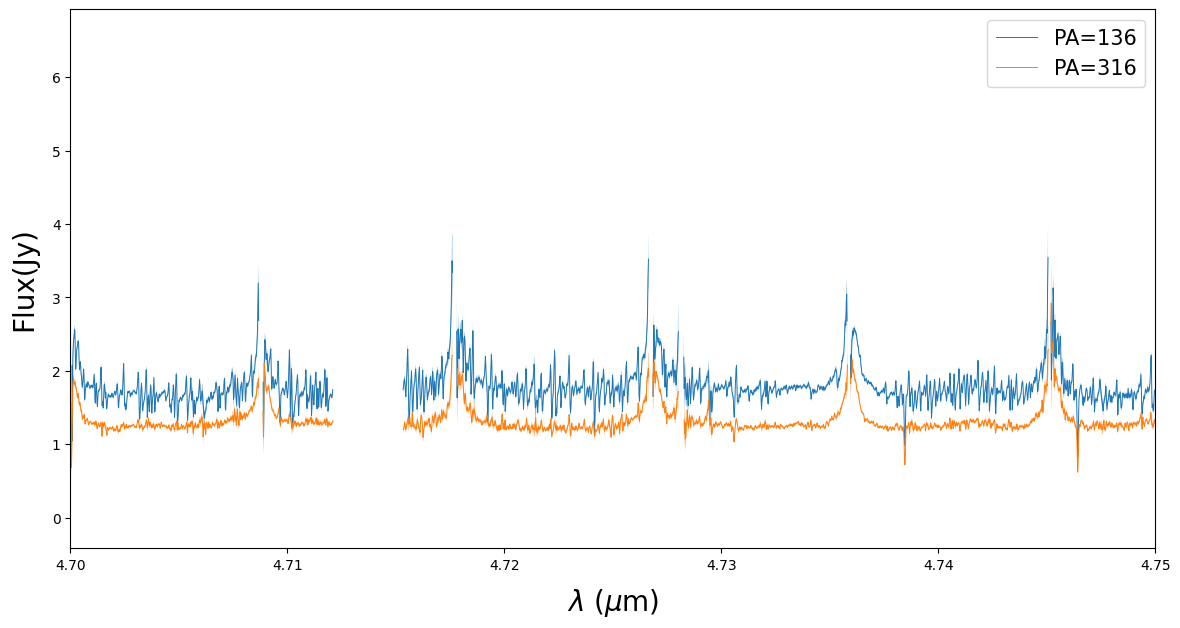

In [36]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)

plt.plot(wave_flux1, flux1, lw=0.7, label=f'PA={PA1}')
plt.fill_between(wave_flux1, flux1-err_flux1, flux1+err_flux1, alpha=0.5)

plt.plot(wave_flux2, flux2, lw=0.7, label=f'PA={PA2}')
plt.fill_between(wave_flux2, flux2-err_flux2, flux2+err_flux2, alpha=0.5)

ax.legend(fontsize=15)
ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 20, labelpad=10)
ax.set_ylabel('Flux(Jy)', fontsize = 20, labelpad=10)
#ax.set_ylim(-0.5, 0.5)
ax.set_xlim(4.7,4.75)

In [37]:
flux2_interp = interpolate.interp1d(wave_flux2, flux2, bounds_error=False)
err_flux2_interp = interpolate.interp1d(wave_flux2, err_flux2, bounds_error=False)

weight1 = 1/err_flux1**2
weight2 = 1/err_flux2_interp(wave_flux1)**2

np.nansum((flux1*weight1, flux2_interp(wave_flux1)*weight2))

flux_ave = (flux1*weight1 + flux2_interp(wave_flux1)*weight2) / (weight1+weight2)
err_flux_ave = np.sqrt(1/(weight1+weight2))

In [38]:
csvfile = open(path+f'reduced/{source}_flux_combined_PA{PA1}_{PA2}.csv', 'w')
csvfile.write('wavelength,  flux, err_flux\n')

for i in range(wave_flux1.size):
    csvfile.write(f'{wave_flux1[i]:11.9f}, {flux_ave[i]:.5f}, {err_flux_ave[i]:.5f}\n')
    
csvfile.close()

(4.7, 4.75)

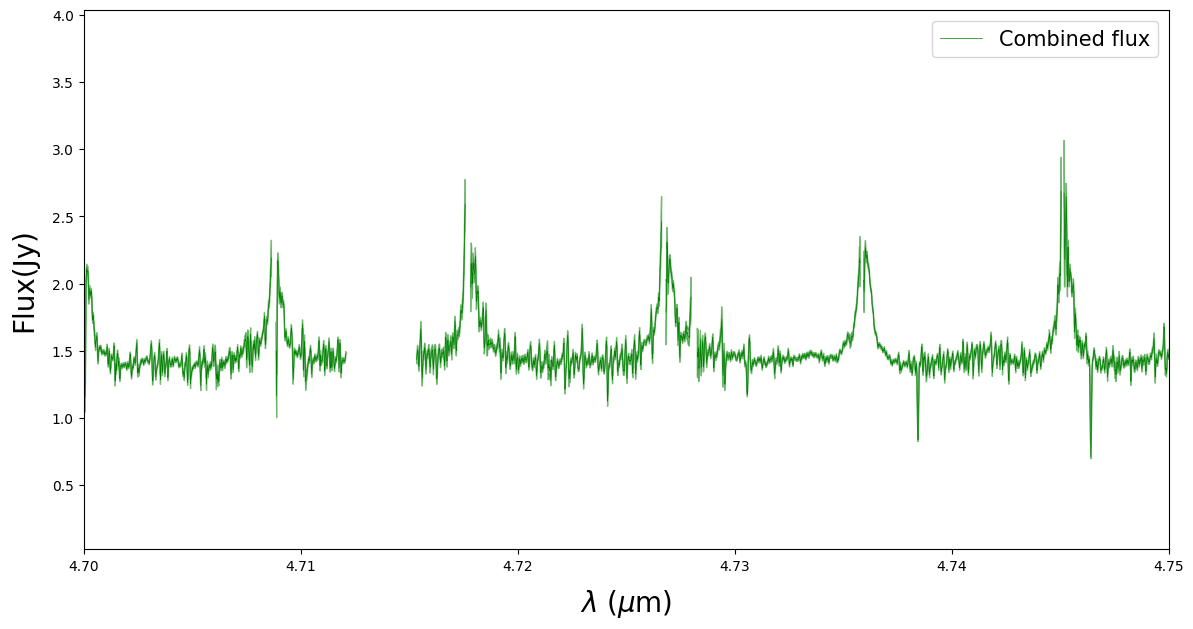

In [39]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)

plt.plot(wave_flux1, flux_ave, lw=0.5, color='g', label='Combined flux')
plt.fill_between(wave_flux1, flux_ave-err_flux_ave, flux_ave+err_flux_ave, alpha=0.5, color='g')


ax.legend(fontsize=15)
ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 20, labelpad=10)
ax.set_ylabel('Flux(Jy)', fontsize = 20, labelpad=10)
#ax.set_ylim(-0.5, 0.5)
ax.set_xlim(4.7,4.75)

# Plots

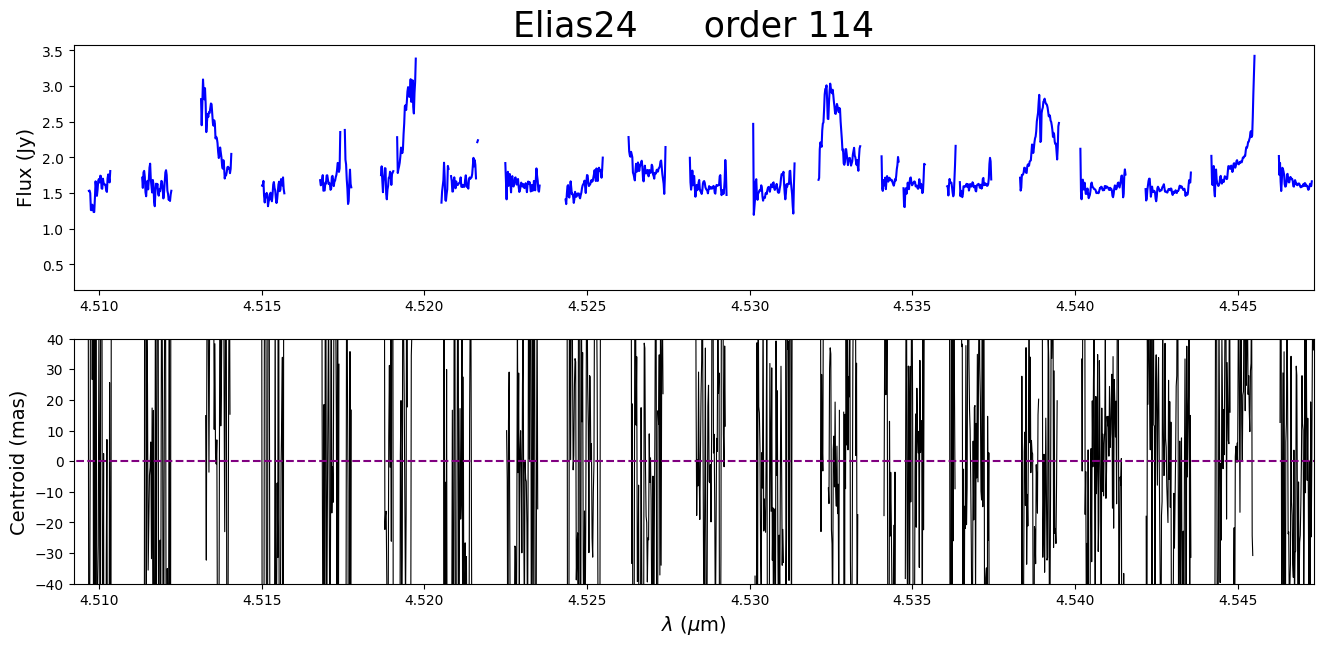

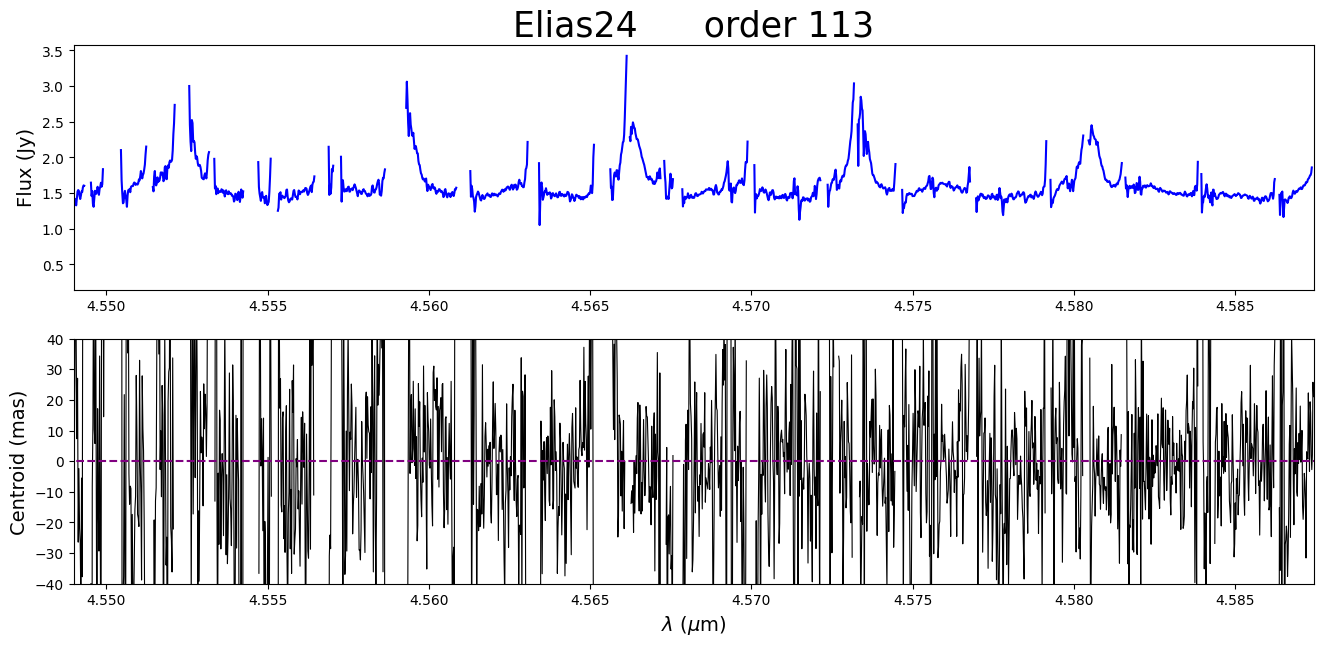

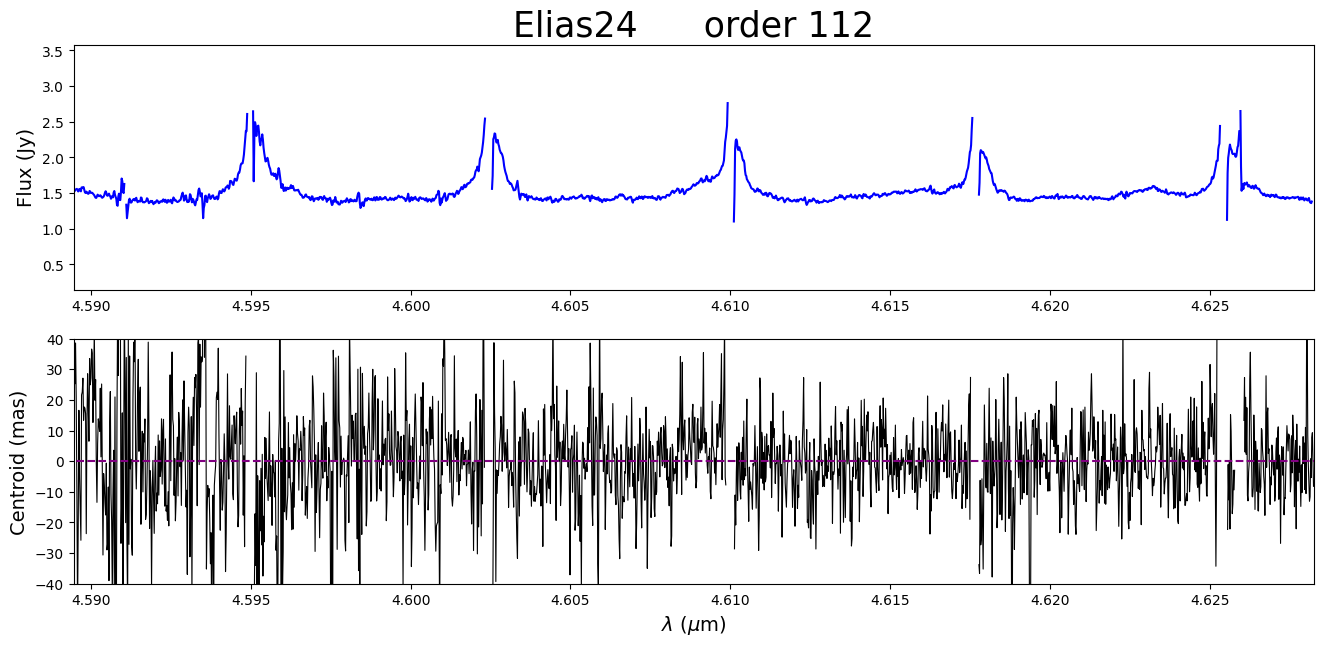

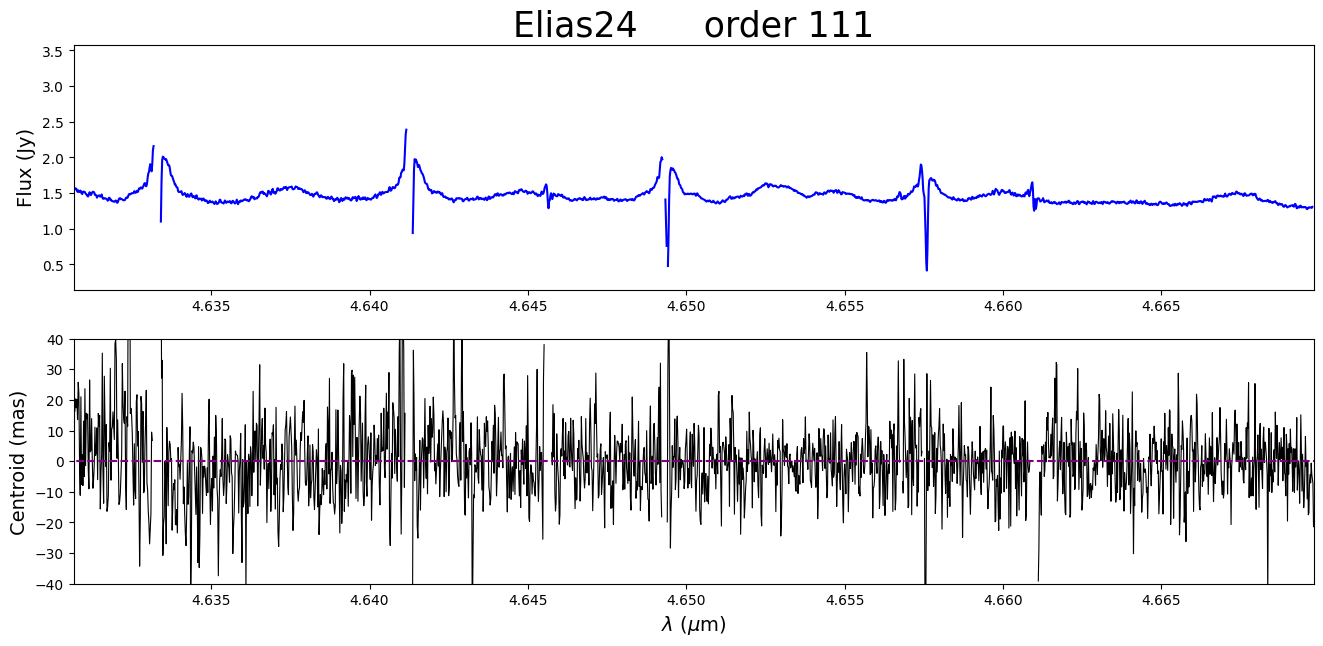

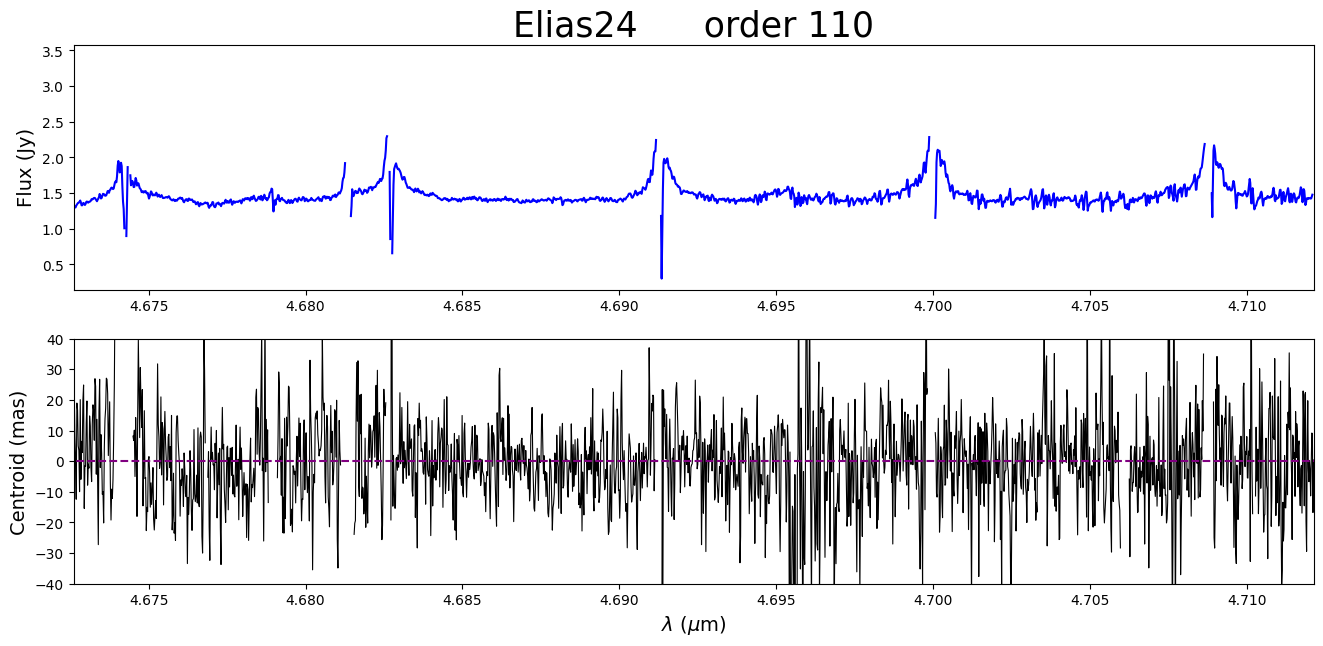

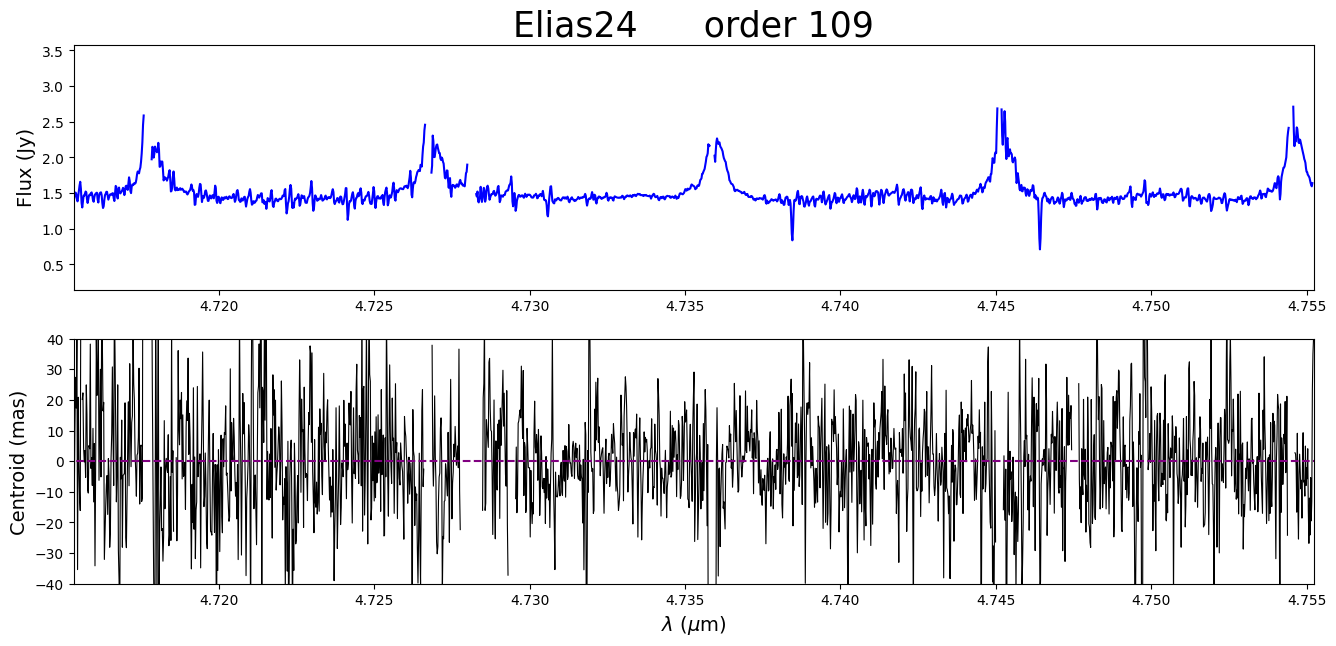

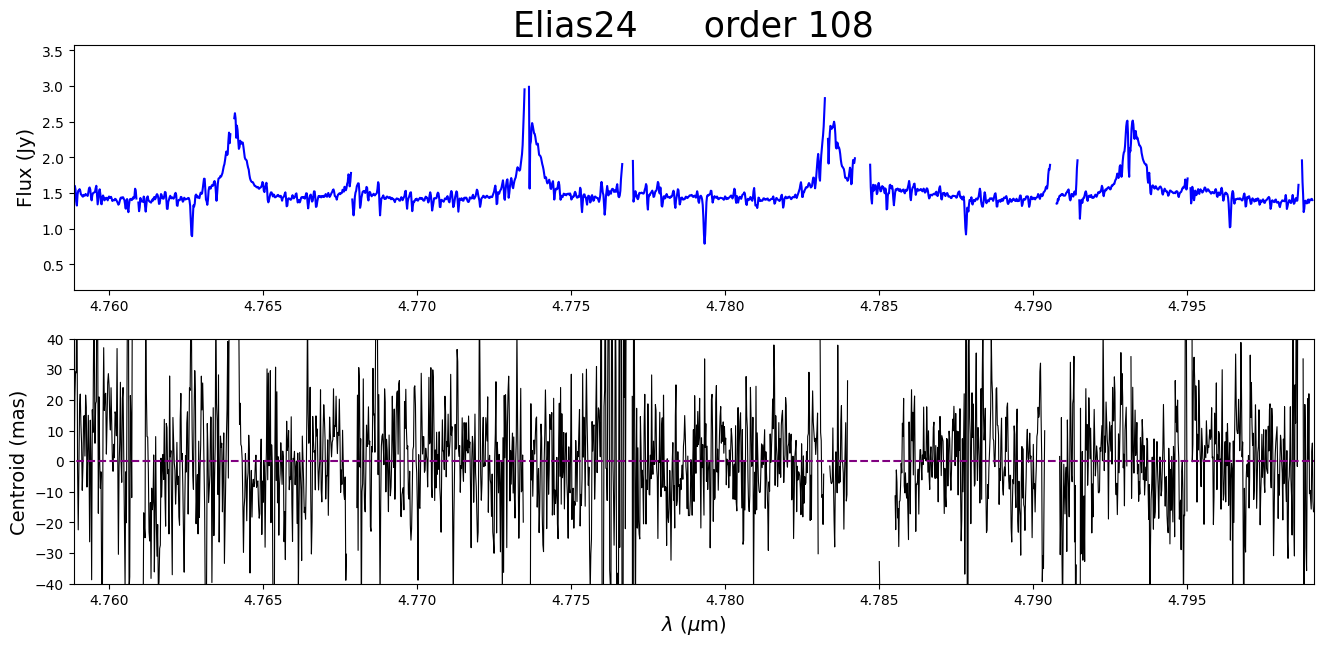

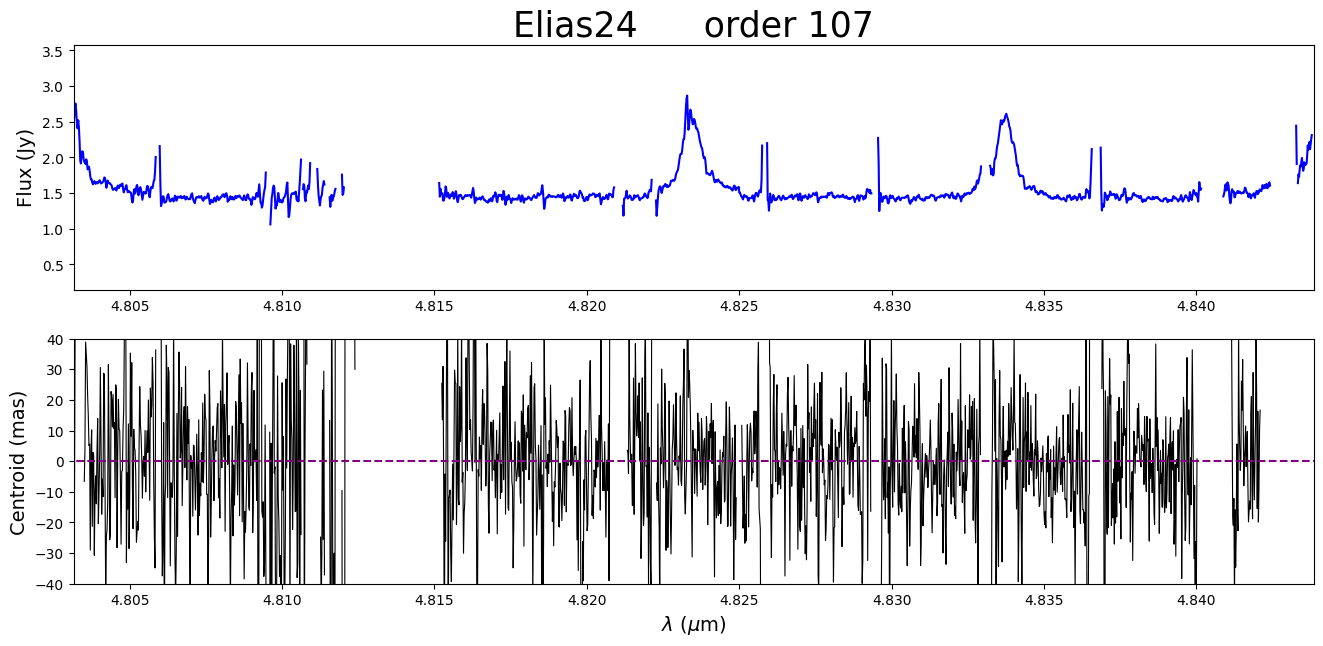

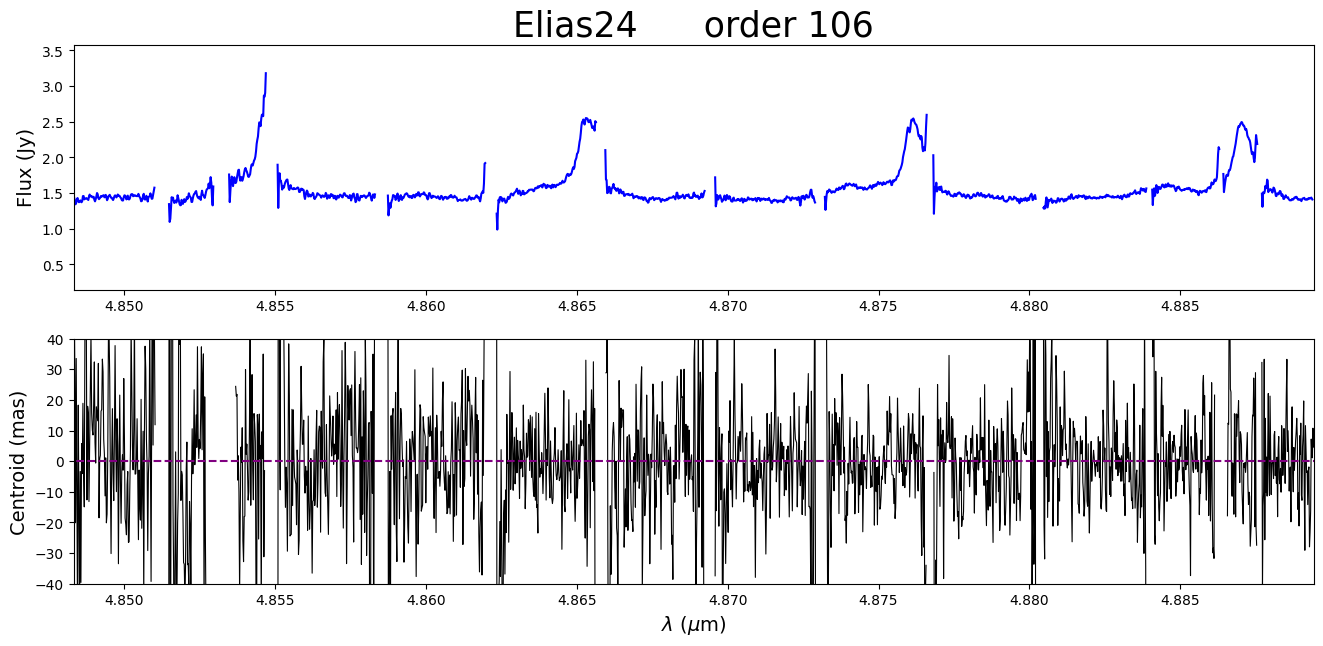

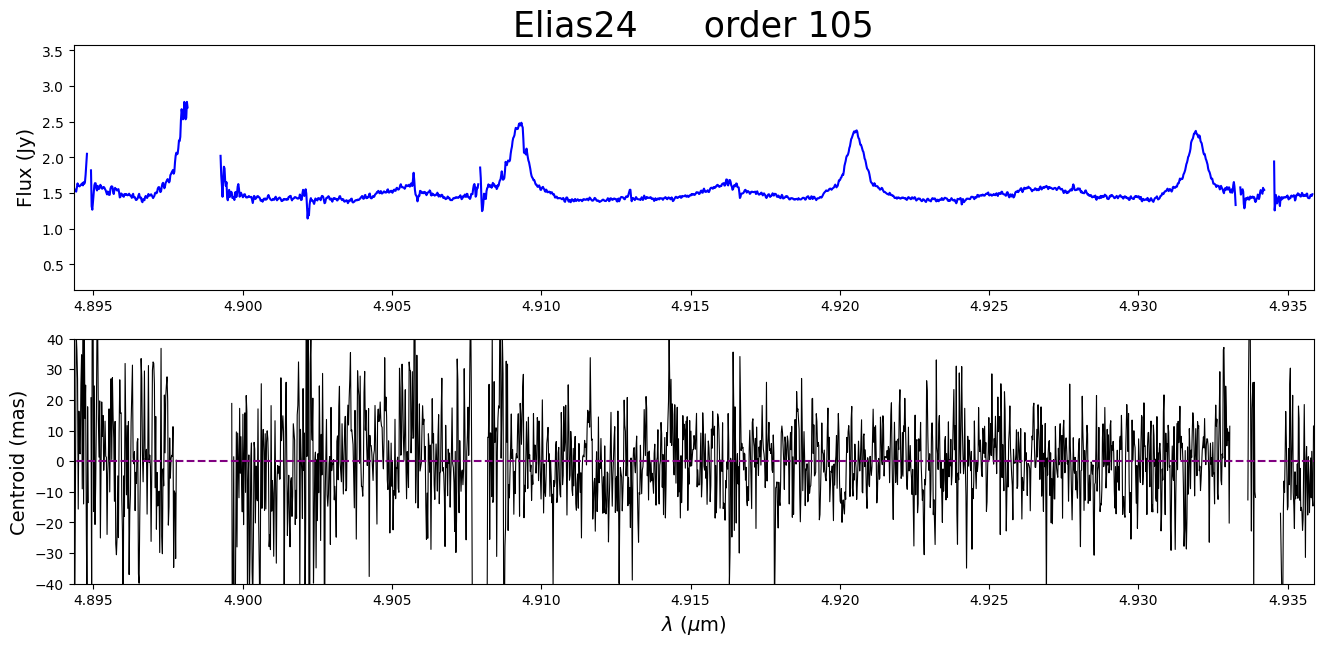

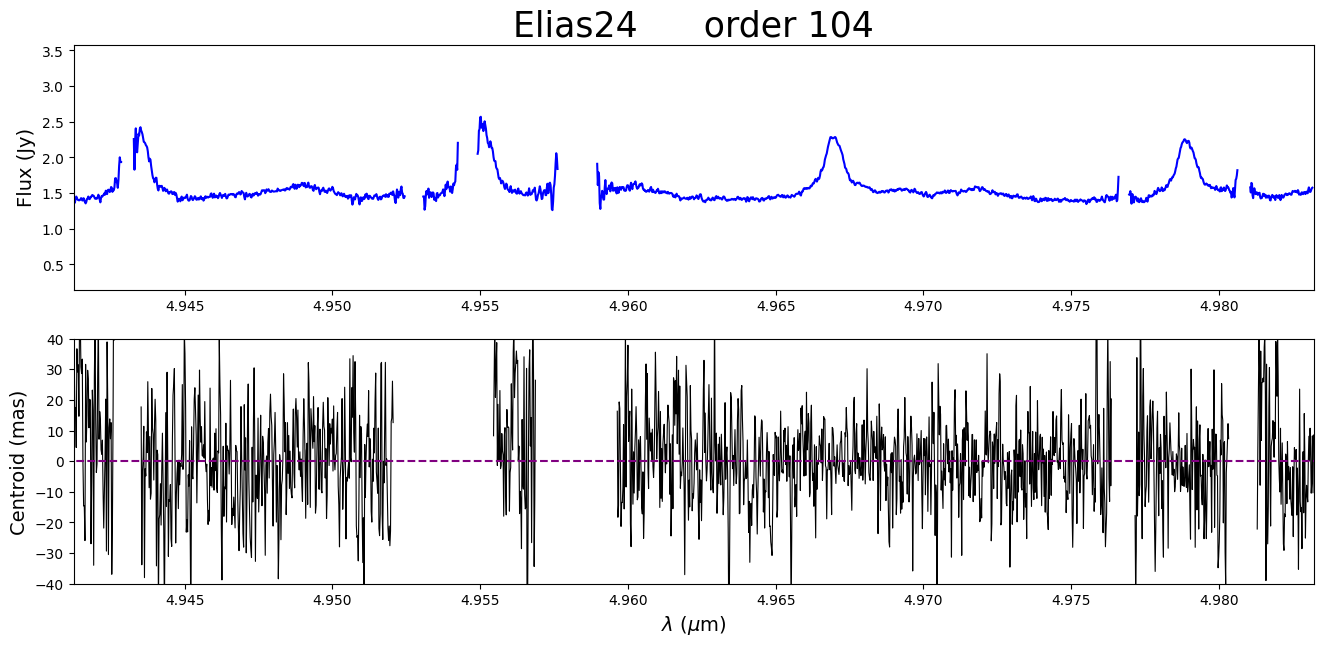

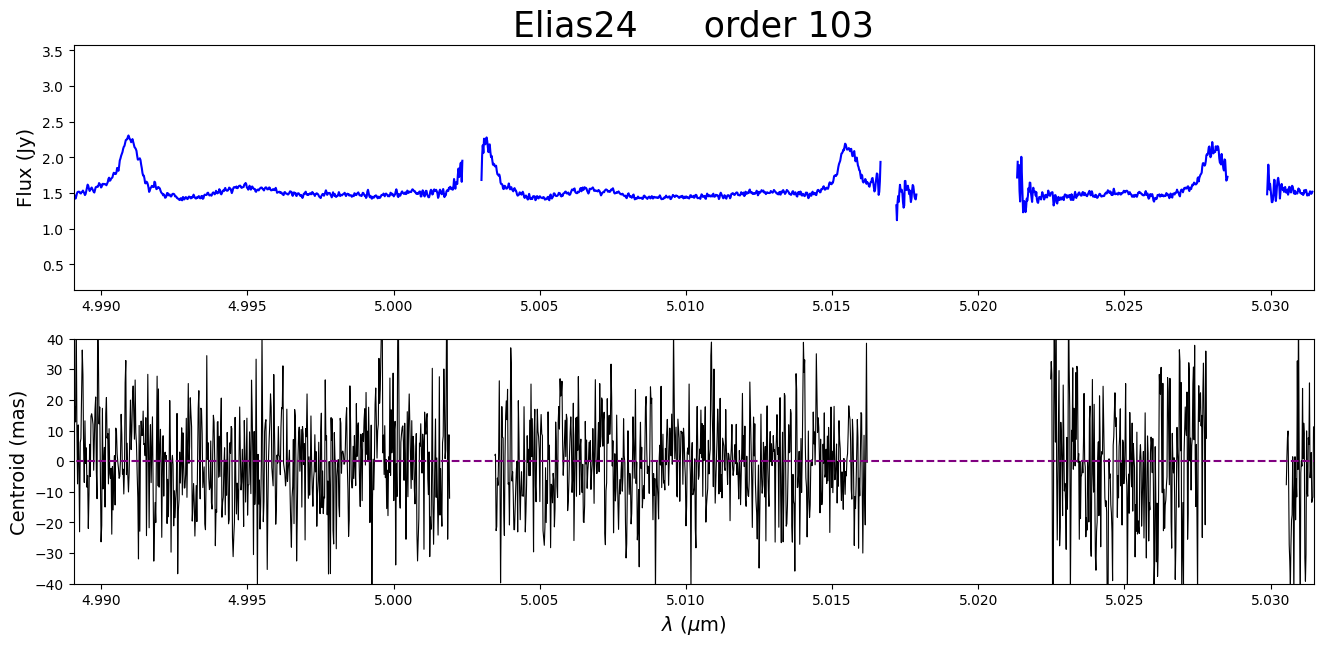

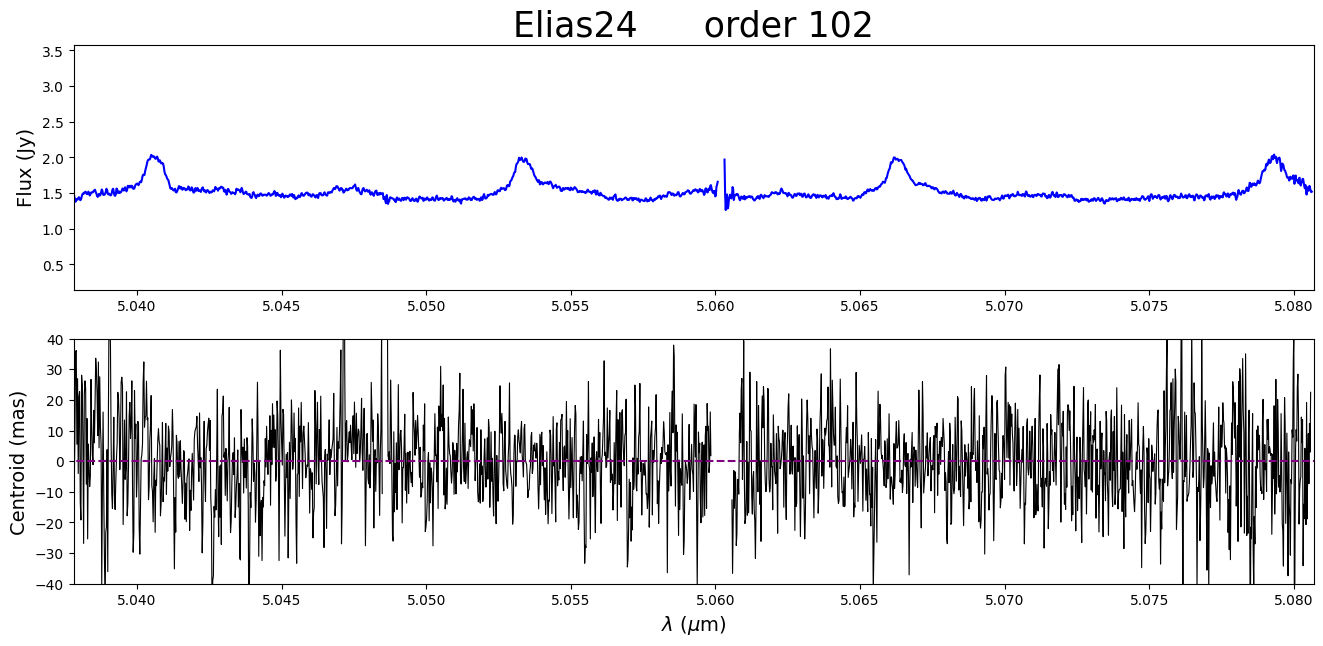

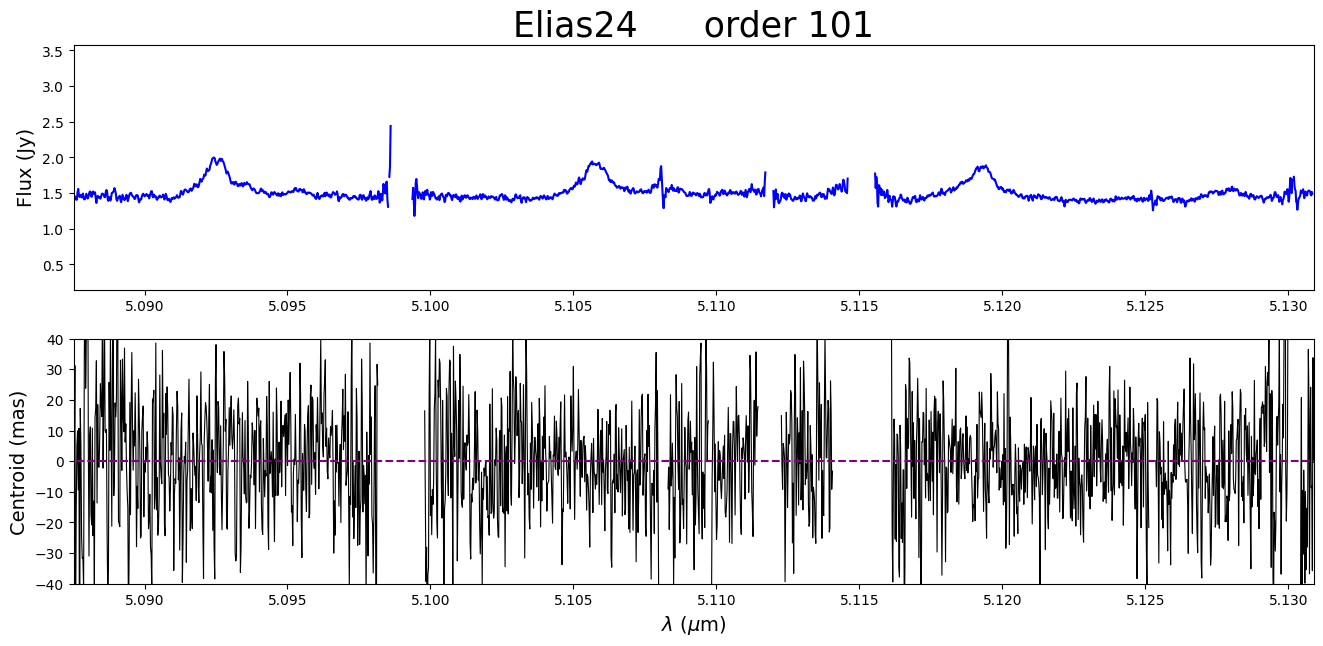

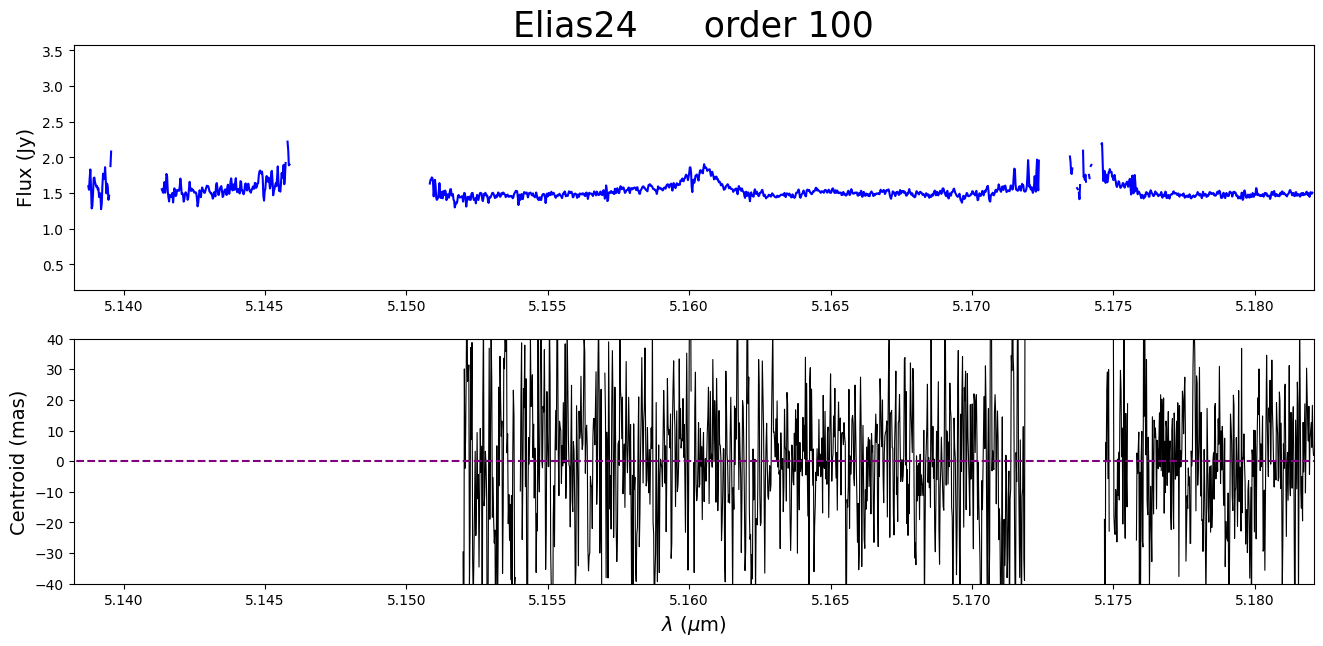

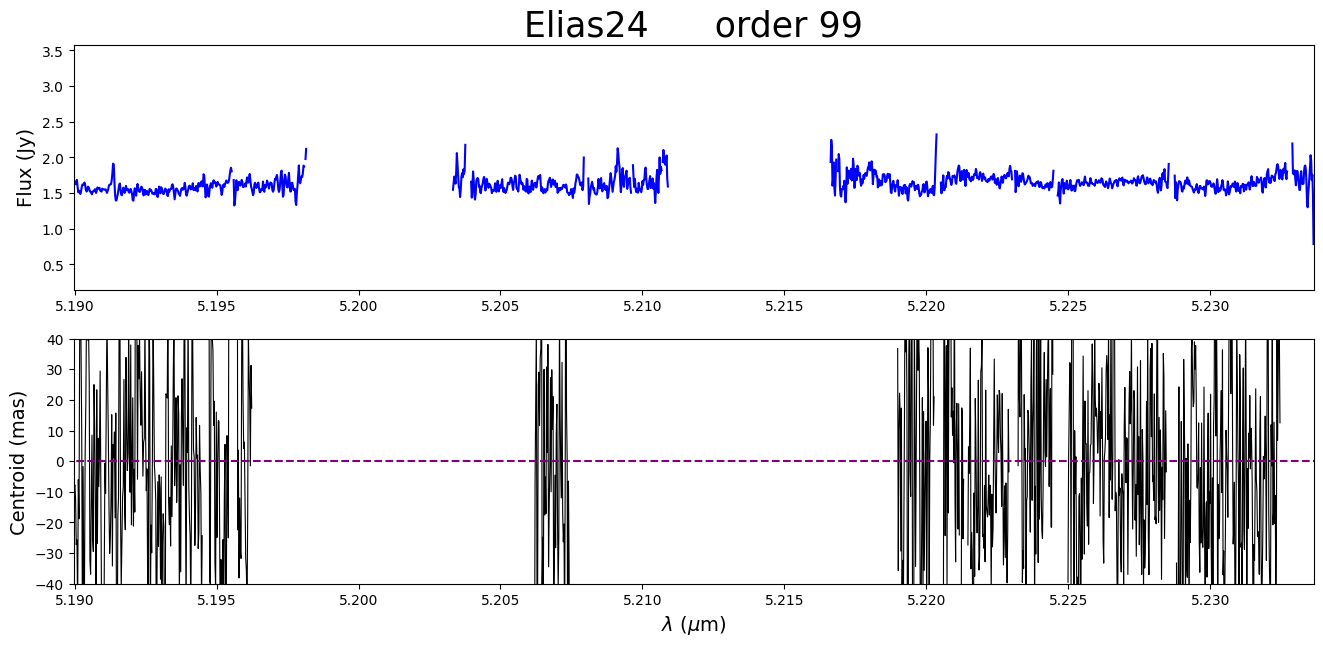

In [40]:
for i in range(16):
    fig = plt.figure(figsize=(16, 7))
    order = i
    wl_spec = data1[-order-1, 0, :]
    xmin, xmax = np.nanmin(wl_spec), np.nanmax(wl_spec)

    ax1 = fig.add_subplot(211)
    ax1.plot(wave_flux1, flux_ave, color='b')
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylabel(r'Flux (Jy)', fontsize=14)

    ax2 = fig.add_subplot(212)
    ax2.plot(wl_par, SA_comb_mas, color='k', lw=0.8)
    ax2.hlines(0,4.5,5.25, color='purple', linestyle='dashed')
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(-40, 40)

    ax2.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
    ax2.set_ylabel(r'Centroid (mas)', fontsize=14)
    
    ax1.set_title(f'{source}      order {114-i}', fontsize=25)

Text(0.5, 0.98, 'Elias24')

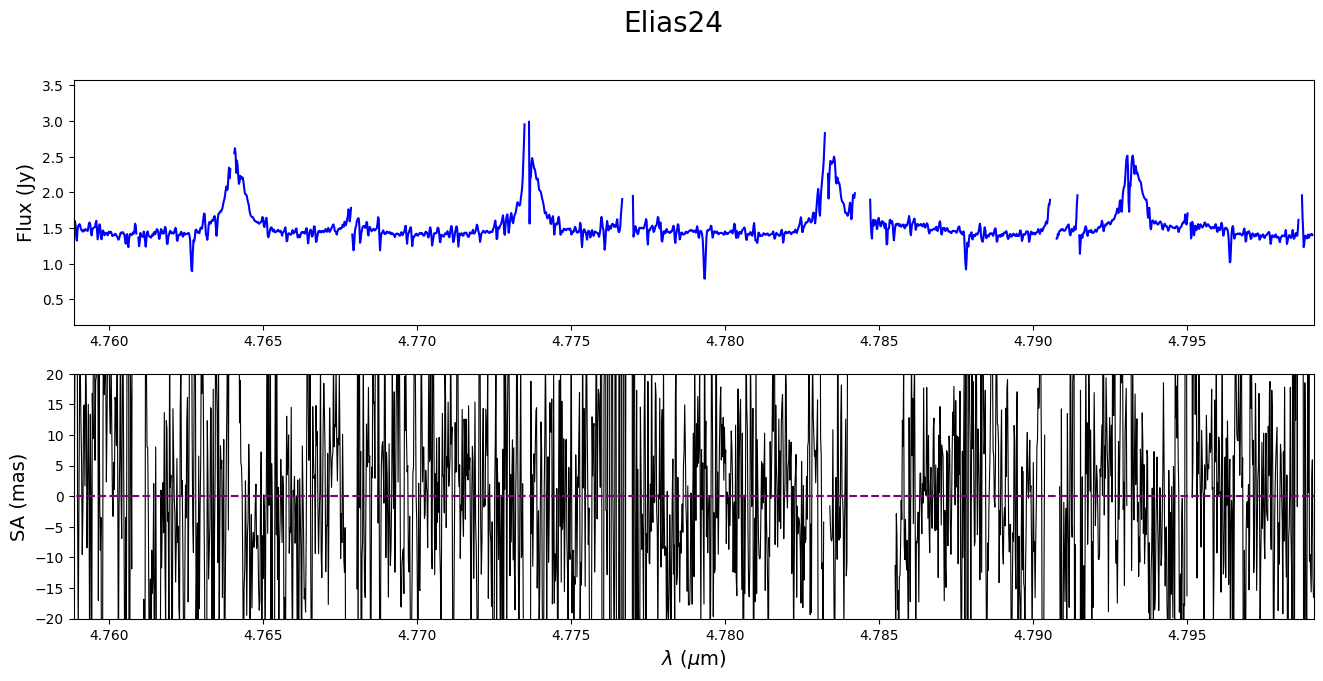

In [41]:
# plot just one order
fig = plt.figure(figsize=(16, 7))
order = 6
wl_spec = data1[-order-1, 0, :]
#wl_spec2 = data2[-order-1, 0, :]
#flux_spec = data1[-order-1, 1, :]
#flux_spec2= data2[-order-1, 1, :]
xmin, xmax = np.nanmin(wl_spec), np.nanmax(wl_spec)

ax1 = fig.add_subplot(211)
#ax1.plot(wl_spec, flux_spec, color='b', label='PA1')
#ax1.plot(wl_spec2, flux_spec2, color='g', label='PA2')
ax1.plot(wave_flux1, flux_ave, color='b', label='Combined')
ax1.set_xlim(xmin, xmax)
ax1.set_ylabel(r'Flux (Jy)', fontsize=14)
#ax1.set_ylim(1, 7)

ax2 = fig.add_subplot(212)
ax2.plot(wl_par, SA_comb_mas, color='k', lw=0.8)
ax2.hlines(0,4.5,5.25, color='purple', linestyle='dashed')
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(-20, 20)

ax2.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
ax2.set_ylabel(r'SA (mas)', fontsize=14)

#ax1.legend(fontsize=10)

fig.suptitle(source, fontsize=20)
#fig.savefig(source+'_SA_medfilt_order108.pdf', dpi=300)

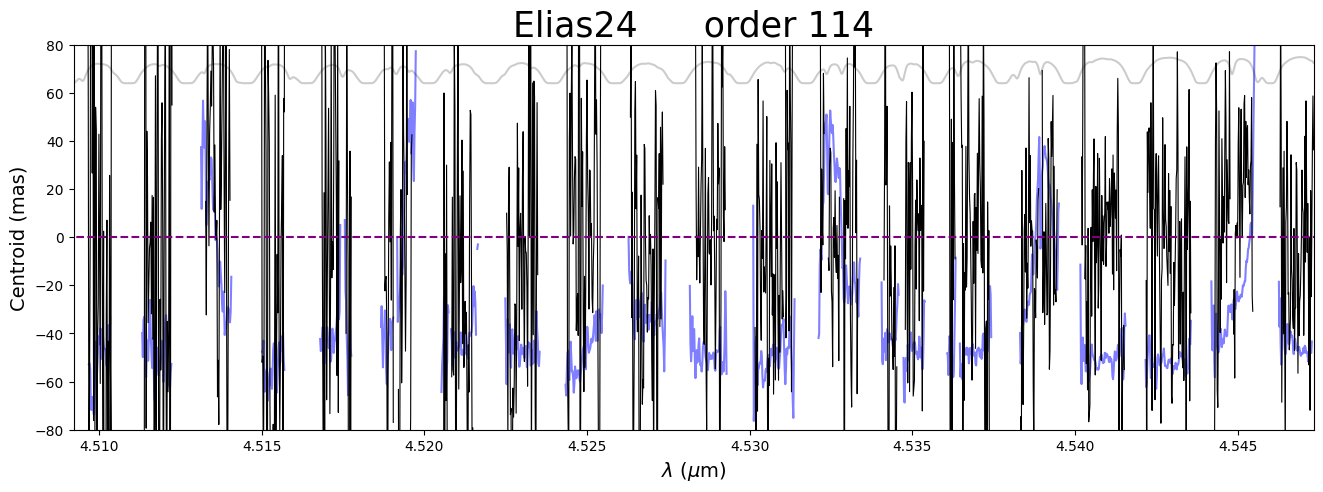

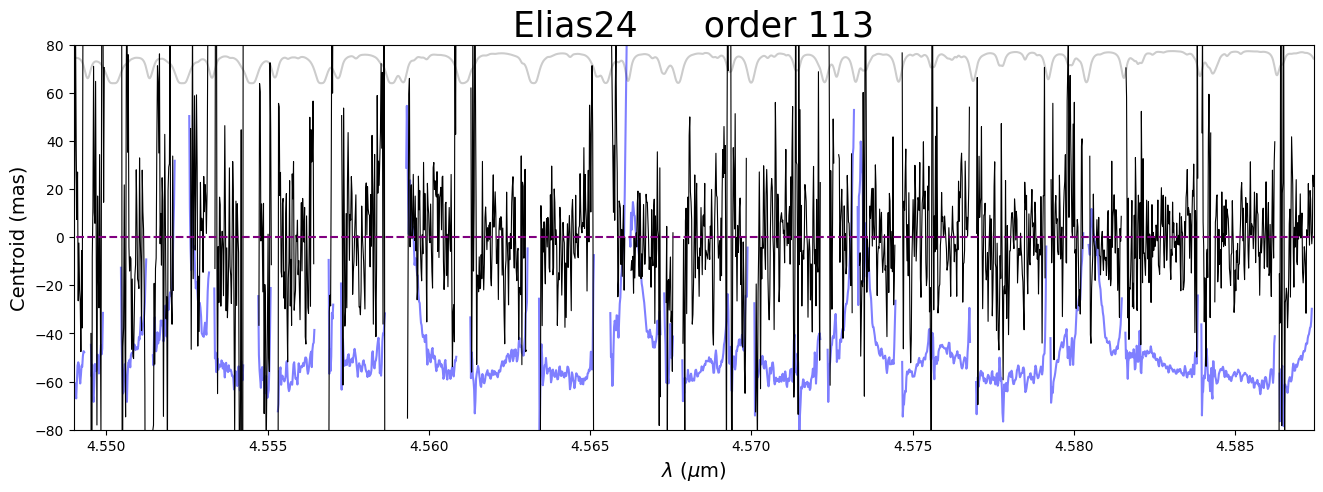

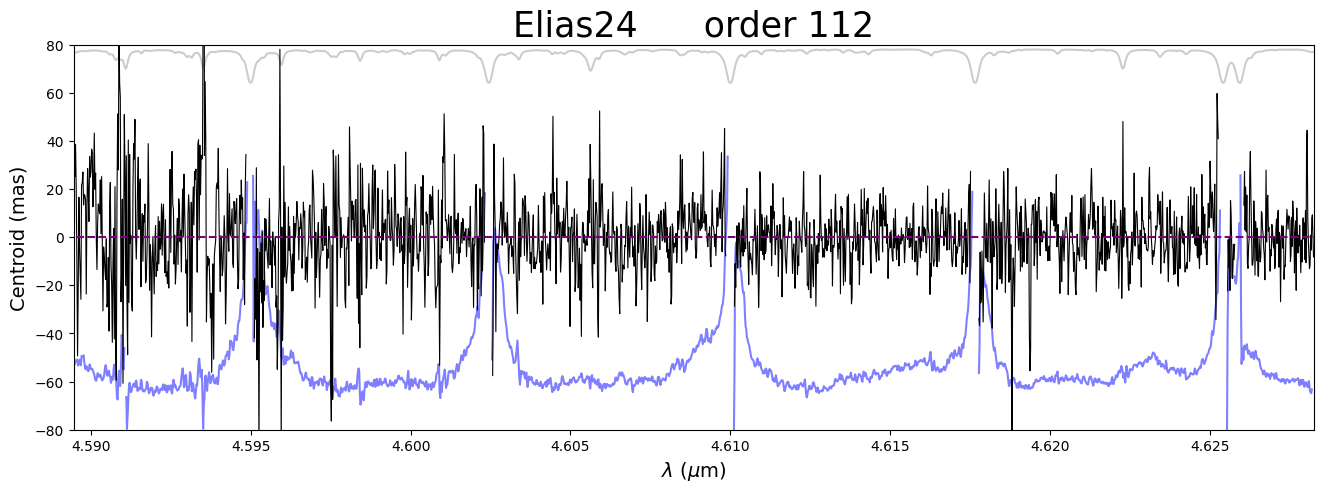

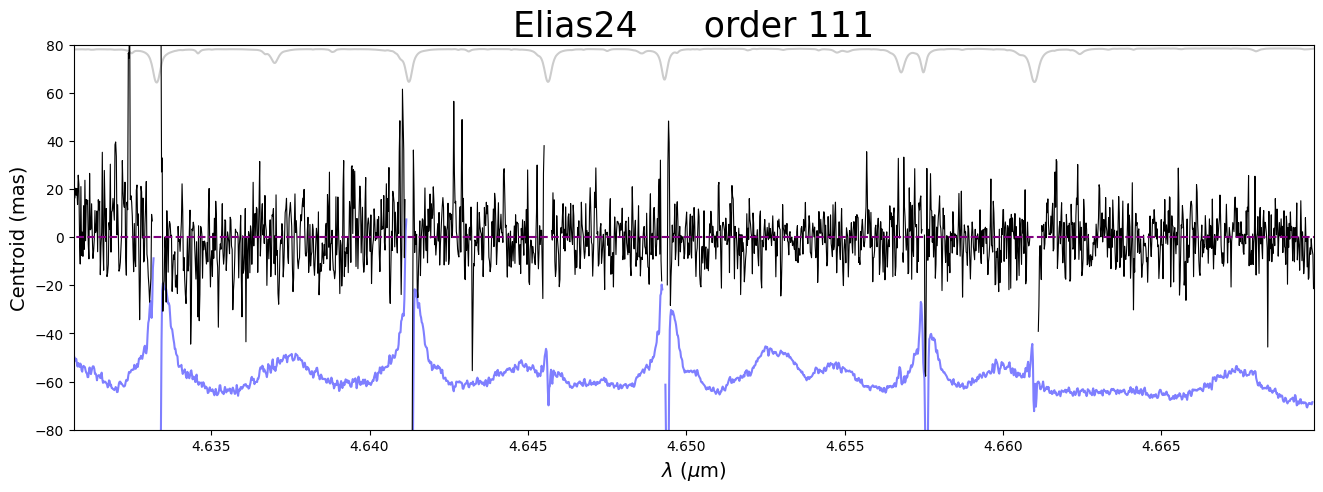

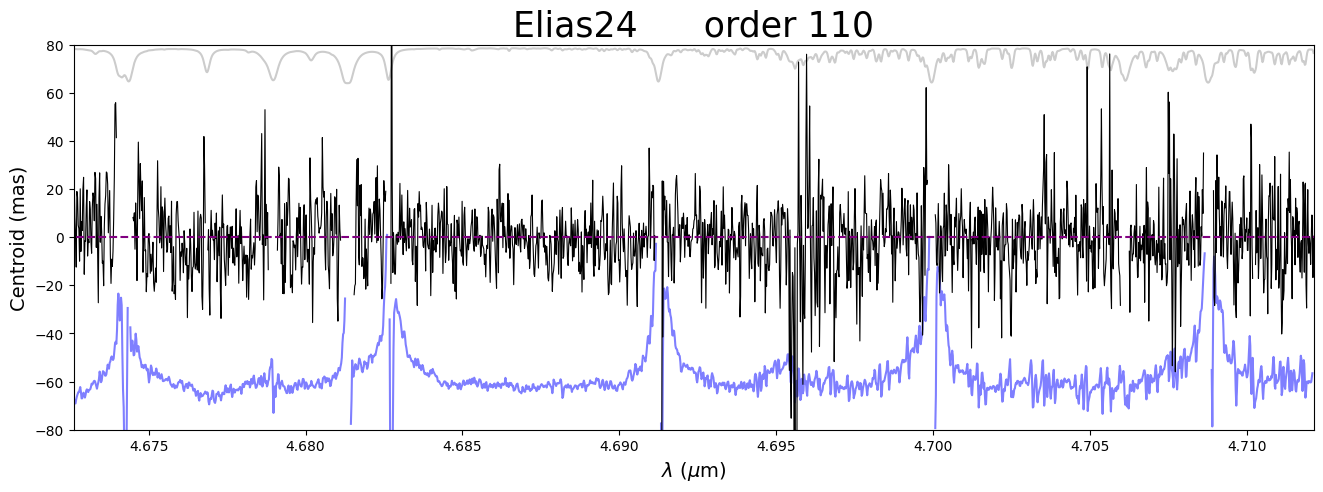

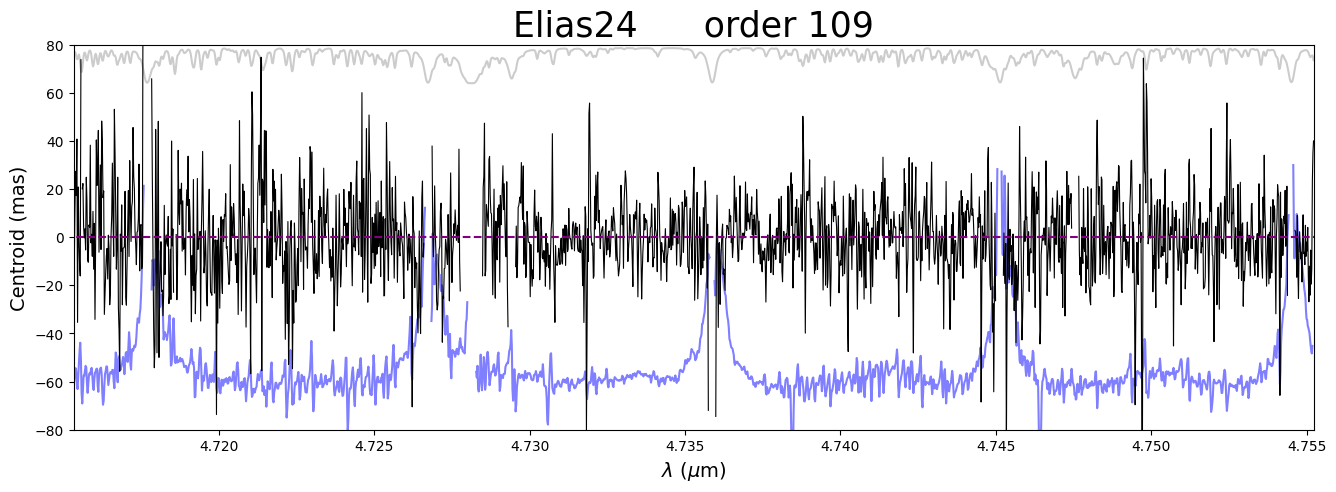

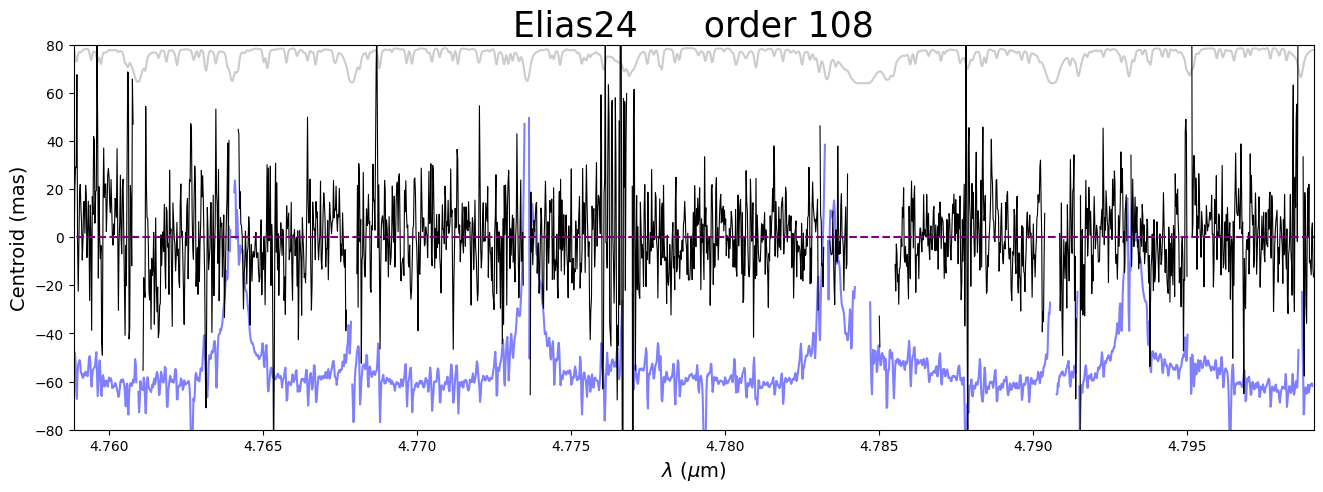

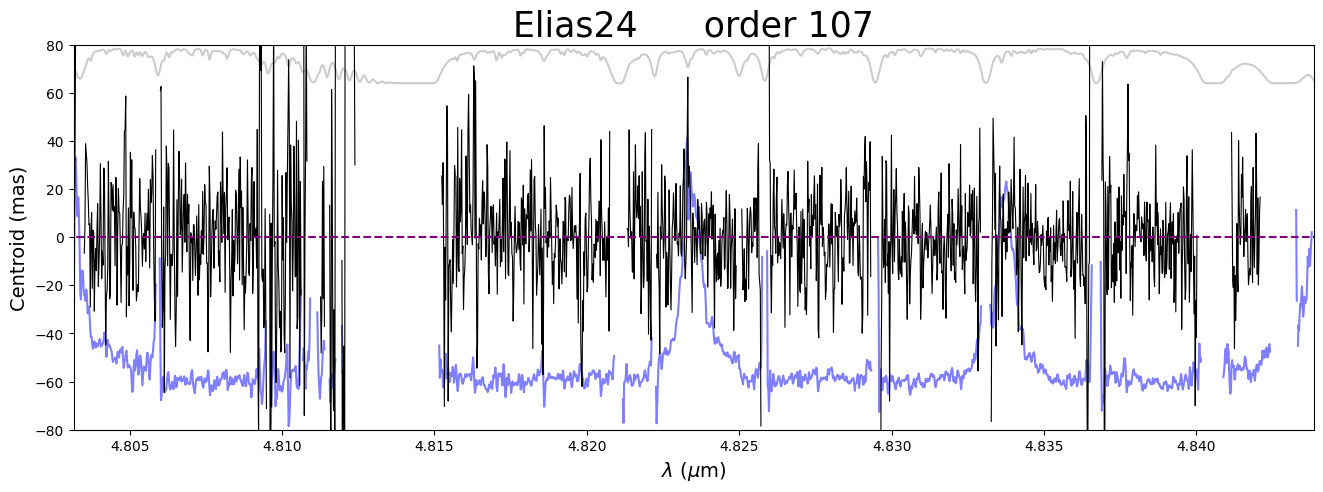

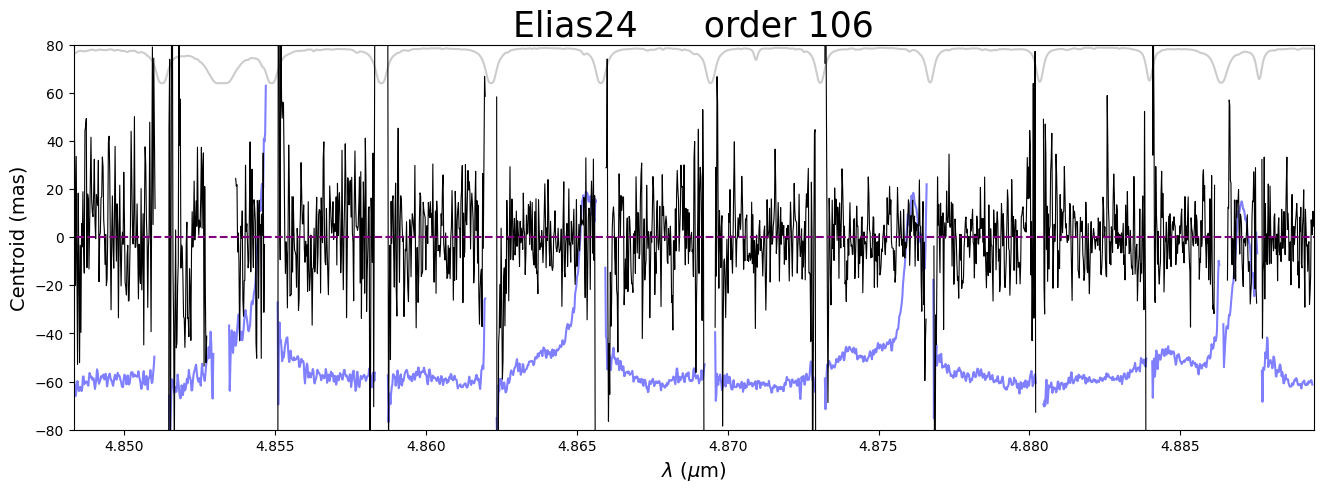

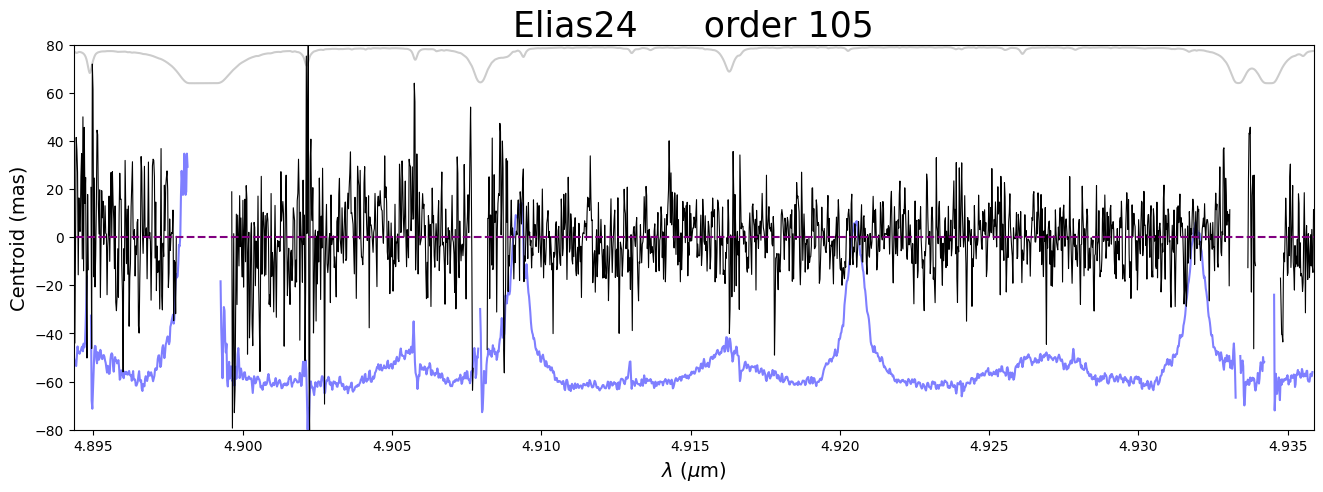

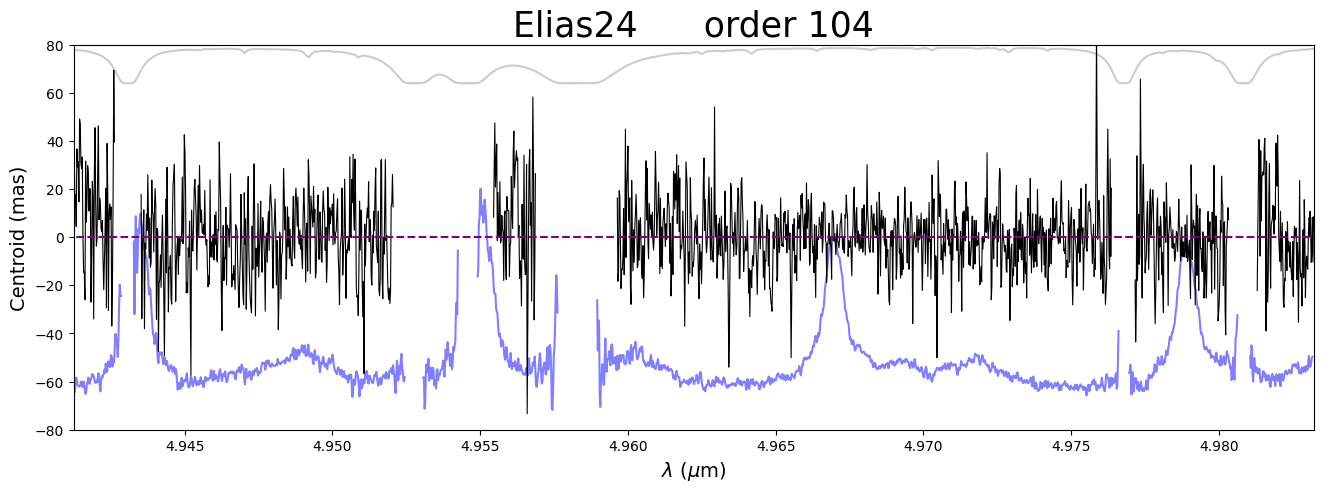

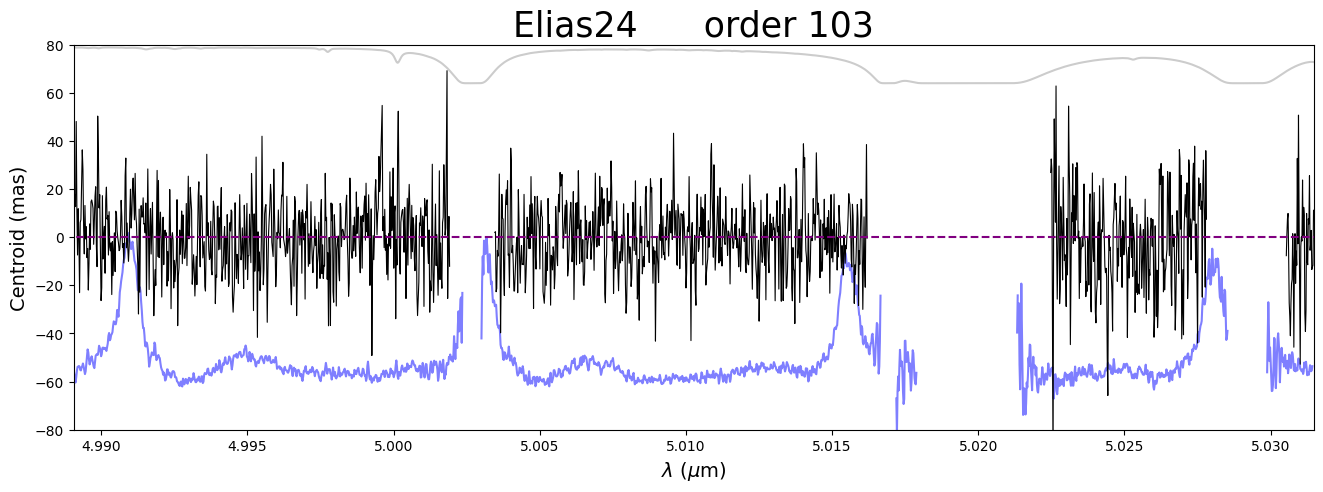

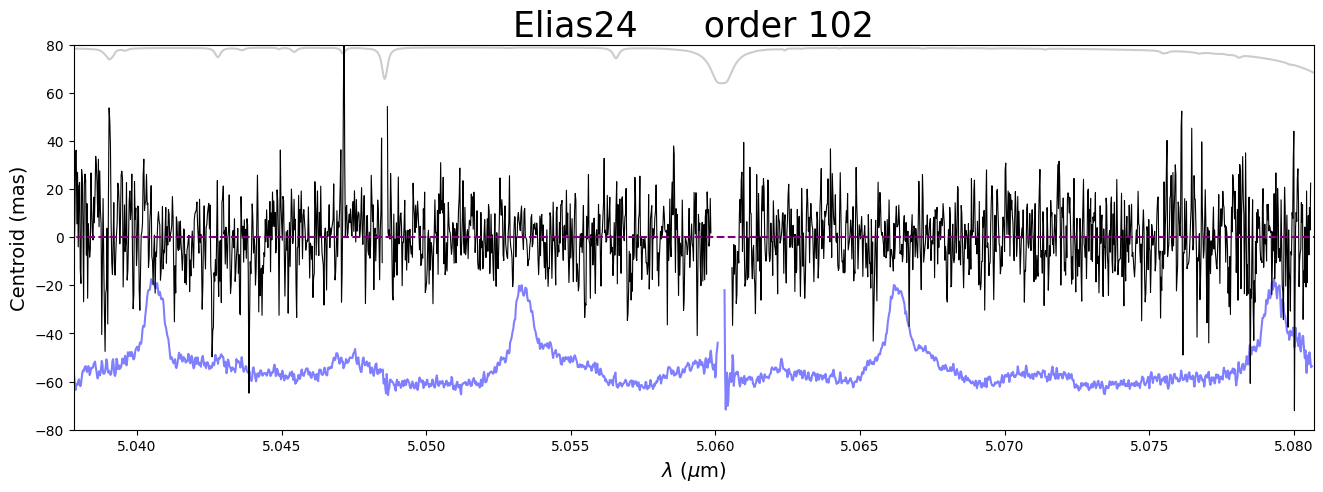

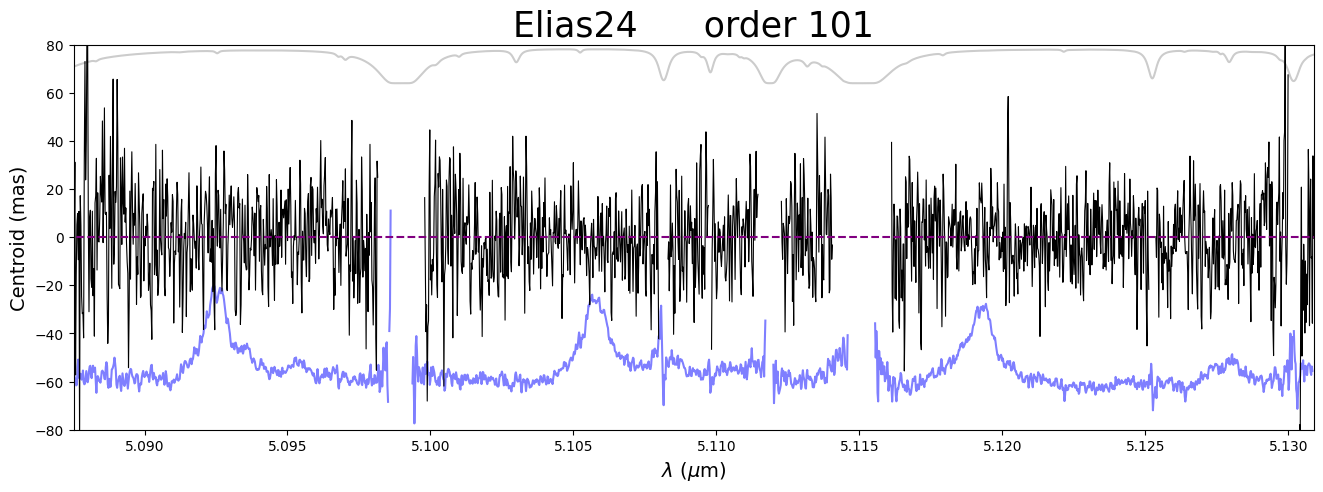

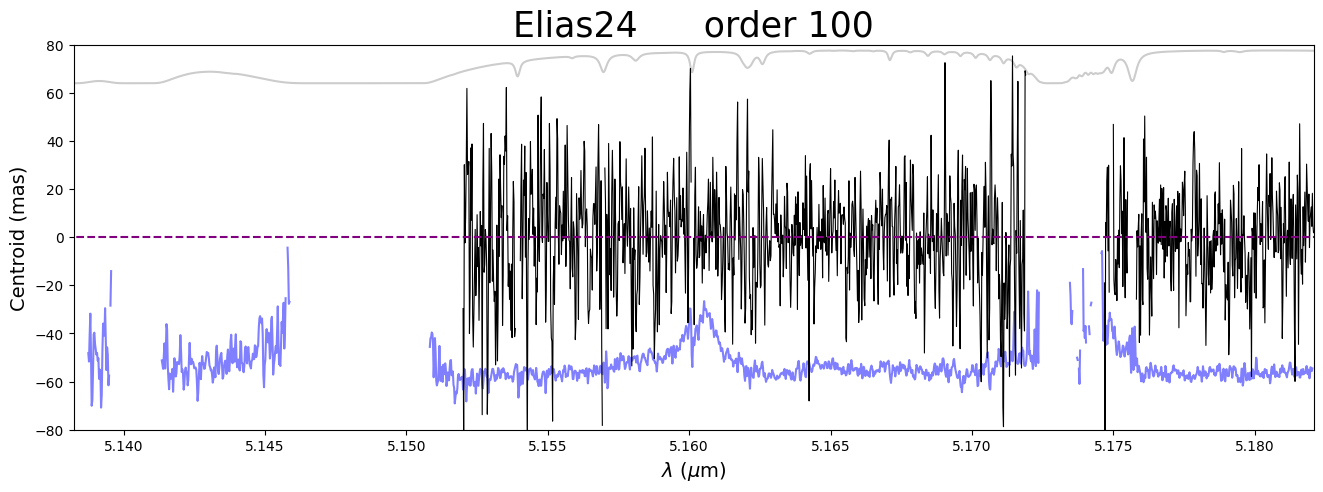

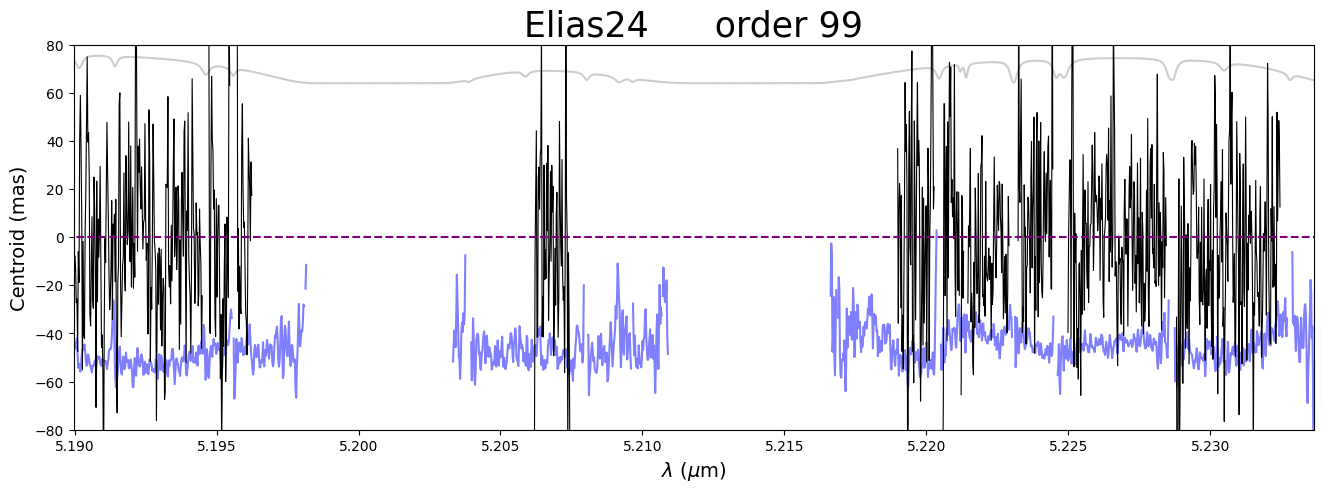

In [42]:
for i in range(16):
    fig = plt.figure(figsize=(16, 5))
    order = i
    wl_spec = data1[-order-1, 0, :]
    #flux_spec = data1[-order-1, 1, :]
    xmin, xmax = np.nanmin(wl_spec), np.nanmax(wl_spec)
    ymin, ymax = -80, 80      # spectroastrometry limits

    tmp1 = flux_ave - np.nanmedian(flux_ave)
    tmp2 = tmp1 / np.nanmax(tmp1)     # median = 0, max = 1
    yoff = 0.85 * ymin + 0.15 * ymax
    flux_norm = (ymax - yoff) * tmp2 + yoff
    yoff_atrans = 0.1 * ymin + 0.9 * ymax

    ax1 = fig.add_subplot(111)
    ax1.plot(wave_flux1, flux_norm, color='b', alpha=0.5, lw=1.5)
    ax1.plot(wl_par, SA_comb_mas, color='k', lw=0.8)
    ax1.hlines(0,4.5,5.25, color='purple', linestyle='dashed')
    ax1.plot(wl_spec, (ymax - yoff_atrans)*atrans(wl_spec)+yoff_atrans, color='k', alpha=0.2)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax1.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
    ax1.set_ylabel(r'Centroid (mas)', fontsize=14)
    
    ax1.set_title(f'{source}      order {114-i}', fontsize=25)